In [1]:
# Importing packages
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
import pandas as pd
import datetime
from datetime import timedelta
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import numpy as np

# Gold vs. Silver

### Gold price with respect to Neveda temperature

In [2]:


df_gold = pd.read_csv(r"Gold Futures Historical Data.csv", decimal = ',')
df_gold.sort_values(by = ['Date'], inplace = True)
df_gold.reset_index(drop = True, inplace = True)
df_gold['Date'] = pd.to_datetime(df_gold['Date'])
df_gold = df_gold[['Date', 'Price', 'Change %']]
df_gold = df_gold.replace(',','', regex=True)
df_gold = df_gold.replace('%','', regex=True)
df_gold['Price']=df_gold['Price'].astype(float)
df_gold['Change %']=df_gold['Change %'].astype(float)
df_gold


Date    Price  Change %
0    2014-01-02  1225.20      1.90
1    2014-01-03  1238.60      1.09
2    2014-01-06  1238.00     -0.05
3    2014-01-07  1229.60     -0.68
4    2014-01-08  1225.50     -0.33
...         ...      ...       ...
2590 2024-01-02  2073.40      0.02
2591 2024-01-03  2042.80     -1.48
2592 2024-01-04  2050.00      0.35
2593 2024-01-05  2049.80     -0.01
2594 2024-01-07  2051.05      0.06

[2595 rows x 3 columns]

In [3]:
df_3574636 = pd.read_csv("3574636.csv")
df_3574636 = df_3574636[df_3574636.notnull().all(axis=1)]
df_3574636 = df_3574636.loc[df_3574636['STATION'] == 'USC00262570']

df_3574639 = pd.read_csv("3574639.csv")
df_3574639 = df_3574639[df_3574639.notnull().all(axis=1)]
df_3574639 = df_3574639.loc[df_3574639['STATION'] == 'USC00262570']

df_Nevada = pd.concat([df_3574636, df_3574639])
df_Nevada.reset_index(drop = True, inplace = True)
df_Nevada = df_Nevada[['DATE', 'PRCP', 'TMAX', 'TMIN']]
df_Nevada['DATE'] = pd.to_datetime(df_Nevada['DATE'])

df_Nevada

DATE  PRCP  TMAX  TMIN
0    2014-01-01   0.0   7.8  -7.2
1    2014-01-02   0.0   7.2  -8.3
2    2014-01-03   0.0   8.3  -8.3
3    2014-01-04   0.0   1.1 -11.7
4    2014-01-05   0.0   2.2 -15.6
...         ...   ...   ...   ...
3661 2024-01-10   7.6  -1.1 -10.6
3662 2024-01-11   0.0  -3.9 -10.0
3663 2024-01-12   0.0   1.1  -6.1
3664 2024-01-13  18.0   2.2  -2.2
3665 2024-01-14   1.8   3.9  -3.3

[3666 rows x 4 columns]

In [4]:
gold = df_gold.set_index("Date").join(df_Nevada.set_index('DATE'))
gold.reset_index(inplace = True, drop = False)
gold

Date    Price  Change %  PRCP  TMAX  TMIN
0    2014-01-02  1225.20      1.90   0.0   7.2  -8.3
1    2014-01-03  1238.60      1.09   0.0   8.3  -8.3
2    2014-01-06  1238.00     -0.05   0.0   2.8 -14.4
3    2014-01-07  1229.60     -0.68   0.0   7.8  -6.1
4    2014-01-08  1225.50     -0.33   0.3   6.1  -2.2
...         ...      ...       ...   ...   ...   ...
2590 2024-01-02  2073.40      0.02   0.0   6.1 -10.6
2591 2024-01-03  2042.80     -1.48   1.3   1.1  -4.4
2592 2024-01-04  2050.00      0.35   0.0   2.8  -2.2
2593 2024-01-05  2049.80     -0.01   0.8   2.2  -6.1
2594 2024-01-07  2051.05      0.06   0.5  -2.2 -14.4

[2595 rows x 6 columns]

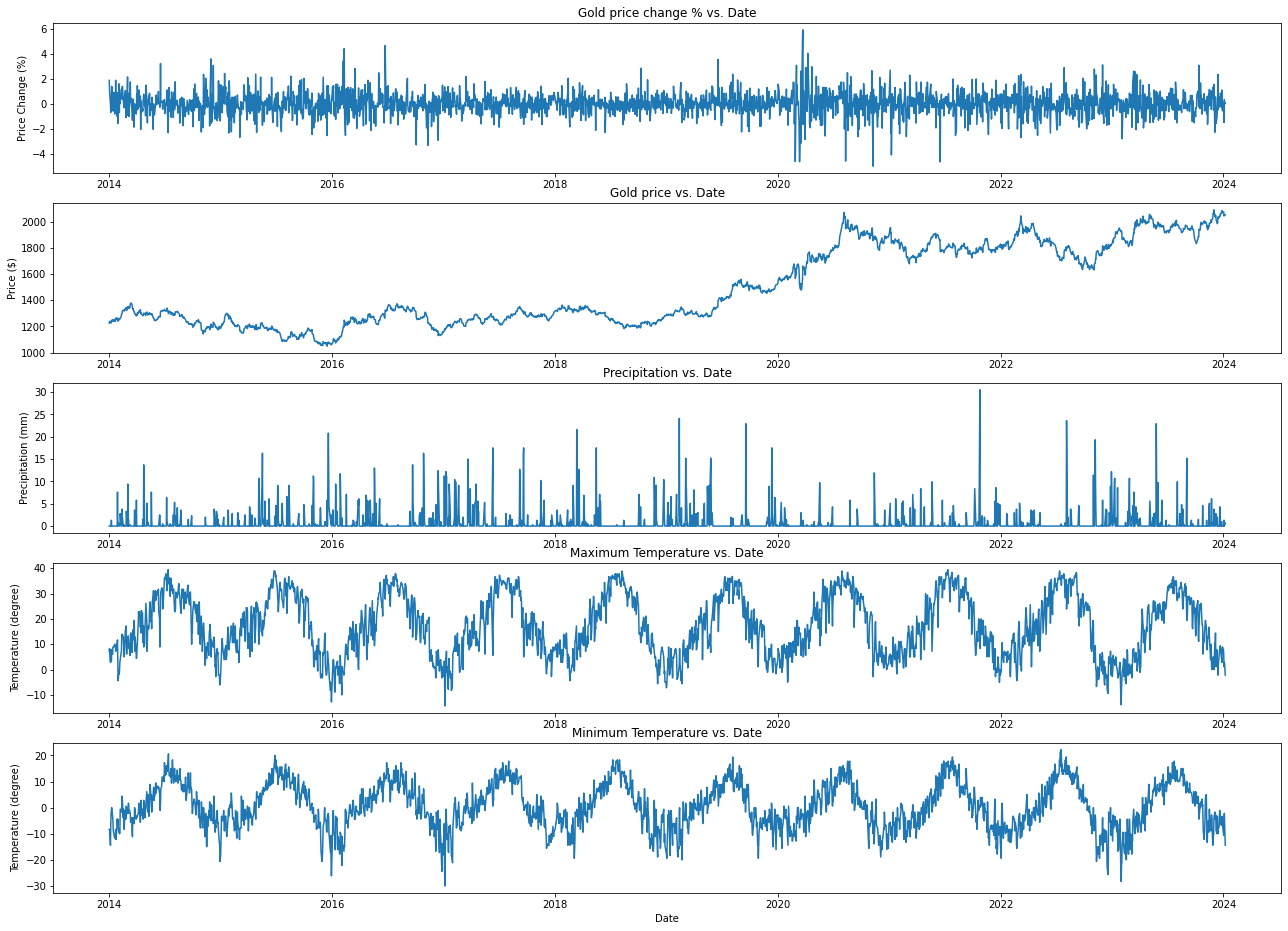

In [5]:

plt.figure(figsize=(22,16))
plt.subplot(511)
plt.plot(gold['Date'],gold['Change %'])
plt.title("Gold price change % vs. Date")
plt.ylabel("Price Change (%)")

plt.subplot(512)
plt.plot(gold['Date'],gold['Price'])
plt.title("Gold price vs. Date")
plt.ylabel("Price ($)")

plt.subplot(513)
plt.plot(gold['Date'],gold['PRCP'])
plt.title("Precipitation vs. Date")
plt.ylabel("Precipitation (mm)")

plt.subplot(514)
plt.plot(gold['Date'],gold['TMAX'])
plt.title("Maximum Temperature vs. Date")
plt.ylabel("Temperature (degree)")

plt.subplot(515)
plt.plot(gold['Date'],gold['TMIN'])
plt.title("Minimum Temperature vs. Date")
plt.ylabel("Temperature (degree)")
plt.xlabel("Date")

plt.show()


D:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


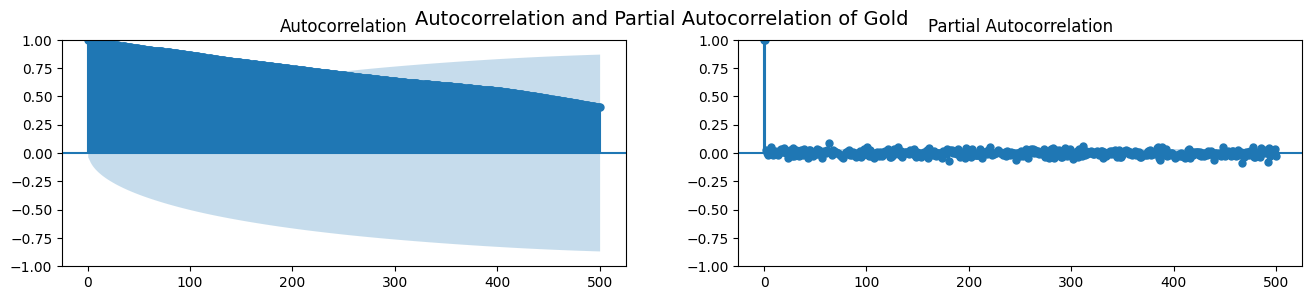

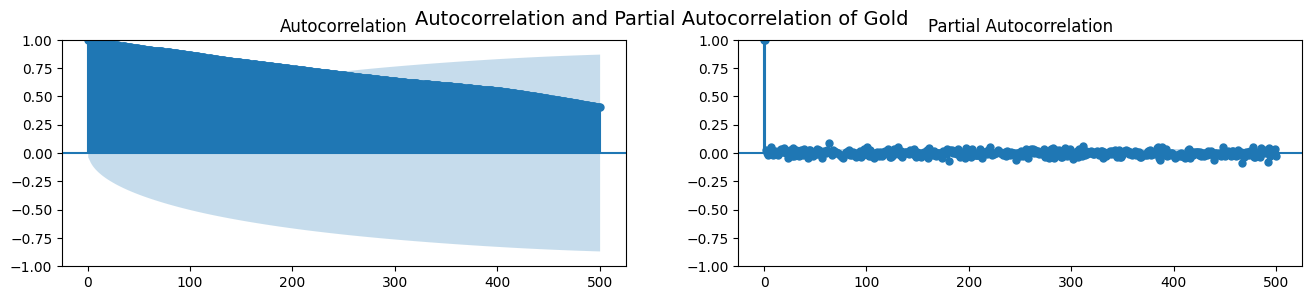

In [6]:
#Autocorrelation and Partial Autocorrelation Graphs
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
fig.suptitle("Autocorrelation and Partial Autocorrelation of Gold", fontsize=14)
plot_acf(gold['Price'].tolist(), lags=500, ax=axes[0])
plot_pacf(gold['Price'].tolist(), lags=500, ax=axes[1])




### Silver price  with respect to Alaska Weather Index

In [7]:
df_silver = pd.read_csv("Silver Futures Historical Data.csv")
df_silver.sort_values(by = ['Date'], inplace = True)
df_silver.reset_index(drop = True, inplace = True)
df_silver['Date'] = pd.to_datetime(df_silver['Date'])
df_silver = df_silver[['Date', 'Price', 'Change %']]
df_silver = df_silver.replace(',','', regex=True)
df_silver = df_silver.replace('%','', regex=True)
df_silver['Price']=df_silver['Price'].astype(float)
df_silver['Change %']=df_silver['Change %'].astype(float)
df_silver

Date   Price  Change %
0    2014-01-02  20.128      3.91
1    2014-01-03  20.211      0.41
2    2014-01-06  20.103     -0.53
3    2014-01-07  19.787     -1.57
4    2014-01-08  19.539     -1.25
...         ...     ...       ...
2574 2024-01-02  23.953     -0.40
2575 2024-01-03  23.157     -3.32
2576 2024-01-04  23.187      0.13
2577 2024-01-05  23.315      0.55
2578 2024-01-07  23.305     -0.04

[2579 rows x 3 columns]

In [8]:
df_3574642 = pd.read_csv("3574642.csv")
df_3574642 = df_3574642[df_3574642.notnull().all(axis=1)]
df_3574642 = df_3574642.loc[df_3574642['STATION'] == 'USW00026411']

df_3574644 = pd.read_csv("3574644.csv")
df_3574644 = df_3574644[df_3574644.notnull().all(axis=1)]
df_3574644 = df_3574644.loc[df_3574644['STATION'] == 'USW00026411']

df_Alaska = pd.concat([df_3574642, df_3574644])
df_Alaska.reset_index(drop = True, inplace = True)
df_Alaska = df_Alaska[['DATE', 'PRCP', 'TMAX', 'TMIN']]
df_Alaska['DATE'] = pd.to_datetime(df_Alaska['DATE'])

df_Alaska

DATE  PRCP  TMAX  TMIN
0    2014-01-01   0.0  -7.1 -22.1
1    2014-01-02   0.3 -11.6 -23.8
2    2014-01-03   0.0  -8.8 -16.6
3    2014-01-04   0.8  -6.6 -21.0
4    2014-01-05   0.3  -4.3 -11.0
...         ...   ...   ...   ...
3661 2024-01-10   0.0 -15.5 -28.8
3662 2024-01-11   0.0 -18.2 -30.5
3663 2024-01-12   0.0 -21.0 -26.0
3664 2024-01-13   0.0 -18.8 -29.3
3665 2024-01-14   3.8 -13.2 -18.8

[3666 rows x 4 columns]

In [9]:
silver = df_silver.set_index("Date").join(df_Alaska.set_index('DATE'))
silver.reset_index(inplace = True, drop = False)
silver

Date   Price  Change %  PRCP  TMAX  TMIN
0    2014-01-02  20.128      3.91   0.3 -11.6 -23.8
1    2014-01-03  20.211      0.41   0.0  -8.8 -16.6
2    2014-01-06  20.103     -0.53   0.0  -6.0 -16.0
3    2014-01-07  19.787     -1.57   0.0 -10.5 -20.5
4    2014-01-08  19.539     -1.25   0.0  -9.3 -14.3
...         ...     ...       ...   ...   ...   ...
2574 2024-01-02  23.953     -0.40   0.0 -21.0 -26.6
2575 2024-01-03  23.157     -3.32   0.0 -17.7 -27.1
2576 2024-01-04  23.187      0.13   0.0 -12.1 -17.7
2577 2024-01-05  23.315      0.55   0.0 -15.6 -26.1
2578 2024-01-07  23.305     -0.04   0.0  -7.7 -23.2

[2579 rows x 6 columns]

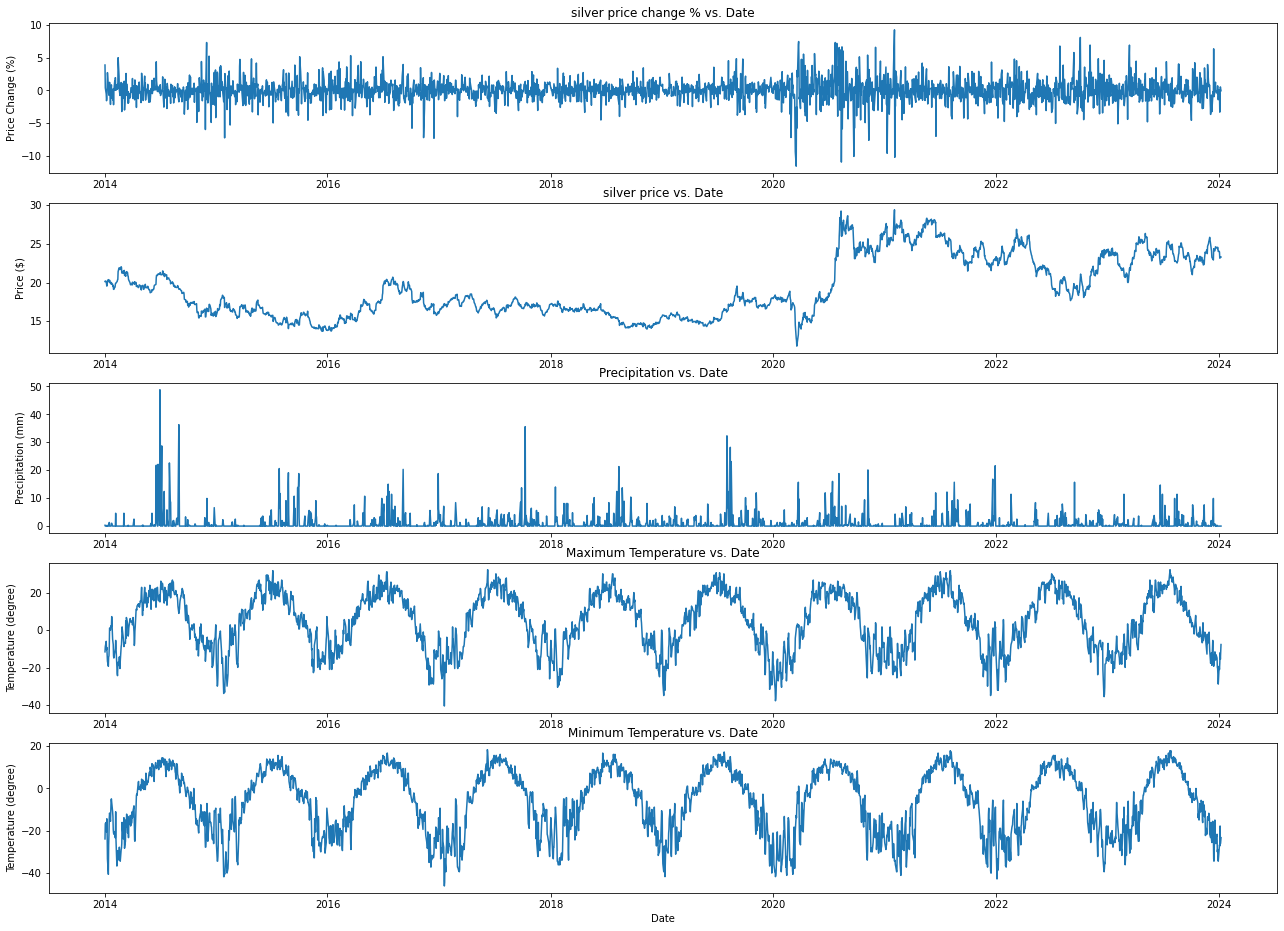

In [10]:
 
plt.figure(figsize=(22,16))
plt.subplot(511)
plt.plot(silver['Date'],silver['Change %'])
plt.title("silver price change % vs. Date")
plt.ylabel("Price Change (%)")

plt.subplot(512)
plt.plot(silver['Date'],silver['Price'])
plt.title("silver price vs. Date")
plt.ylabel("Price ($)")

plt.subplot(513)
plt.plot(silver['Date'],silver['PRCP'])
plt.title("Precipitation vs. Date")
plt.ylabel("Precipitation (mm)")

plt.subplot(514)
plt.plot(silver['Date'],silver['TMAX'])
plt.title("Maximum Temperature vs. Date")
plt.ylabel("Temperature (degree)")

plt.subplot(515)
plt.plot(silver['Date'],silver['TMIN'])
plt.title("Minimum Temperature vs. Date")
plt.ylabel("Temperature (degree)")
plt.xlabel("Date")

plt.show()


D:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


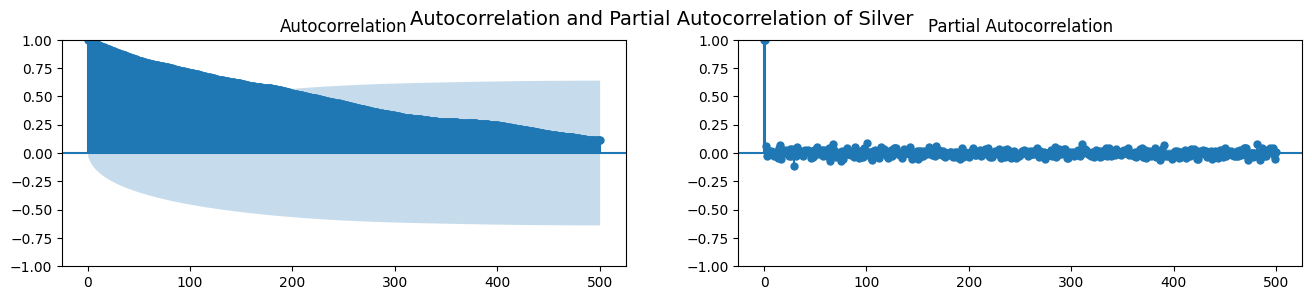

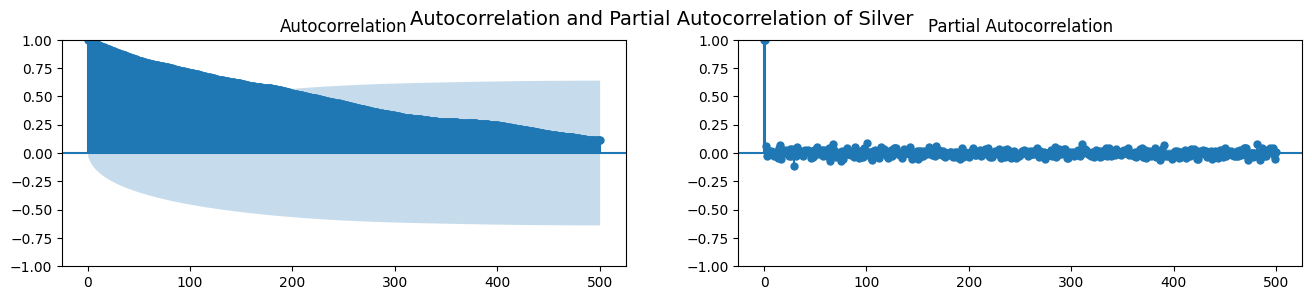

In [11]:
#Autocorrelation and Partial Autocorrelation Graphs
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
fig.suptitle("Autocorrelation and Partial Autocorrelation of Silver", fontsize=14)
plot_acf(silver['Price'].tolist(), lags=500, ax=axes[0])
plot_pacf(silver['Price'].tolist(), lags=500, ax=axes[1])

## Gold and Silver Analysis

In [12]:
corr_gold_silver = df_gold[['Date', 'Price', 'Change %']].set_index("Date").join(df_silver[['Date', 'Price', 'Change %']].set_index('Date'), lsuffix = '_gold', rsuffix = '_silver')
corr_matrix = corr_gold_silver.corr()

print("Correlation matrix between Gold and Silver:")
print(corr_matrix)

Correlation matrix between Gold and Silver:
                 Price_gold  Change %_gold  Price_silver  Change %_silver
Price_gold         1.000000       0.031351      0.846702         0.036173
Change %_gold      0.031351       1.000000      0.024936         0.779568
Price_silver       0.846702       0.024936      1.000000         0.050761
Change %_silver    0.036173       0.779568      0.050761         1.000000


### FB Prophet of Gold with and without multivariate weather index

In [13]:
#gold train and gold test
gold.rename(columns = {'Price':'y','Date':'ds'}, inplace = True)
gold_train = gold[:int(0.8*len(gold))]
gold_test = gold[int(0.8*len(gold)):]

In [14]:
model_gold_single = Prophet(interval_width = 0.9)
model_gold_single.fit(gold_train)

gold_single_test_feed = gold_test[['ds']]
forecast_gold_single = model_gold_single.predict(gold_single_test_feed)
forecast_gold_single2 = forecast_gold_single [['ds', 'yhat']]

final_gold_single = forecast_gold_single2.merge(gold_test, how = 'left')

mape_gold_single = mape(final_gold_single.y, final_gold_single.yhat)
mae_gold_single = mae(final_gold_single.y, final_gold_single.yhat)
print("gold_single mape error:", mape_gold_single)
print("gold_single mae error:", mae_gold_single)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


gold_single mape error: 0.0772387068175377
gold_single mae error: 149.1864873938965


Text(0.5, 1.0, 'Gold Price Prediciton without Weather Index')

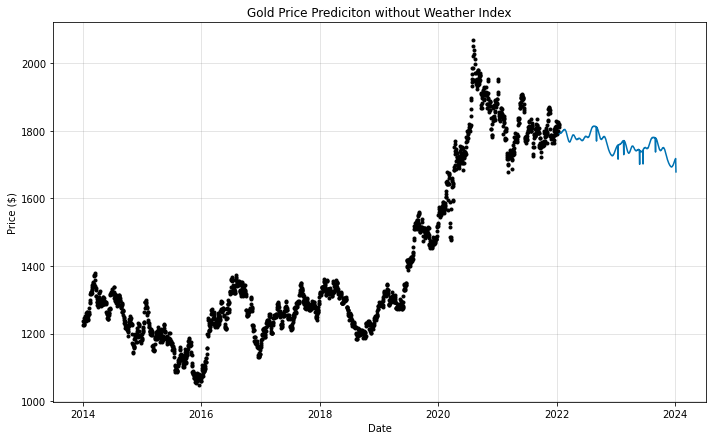

In [15]:
goldfig1 = model_gold_single.plot(forecast_gold_single, uncertainty=False, xlabel = "Date", ylabel = "Price ($)")
goldax1 = goldfig1.get_axes()
goldax1[0].set_title("Gold Price Prediciton without Weather Index")

D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Text(0.5, 1.0, 'Component graphs for Gold Price Prediciton without Weather Index')

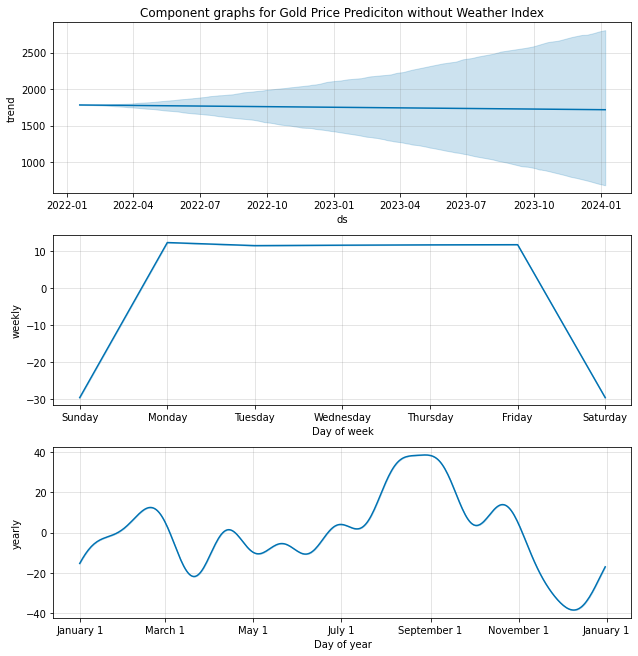

In [16]:
goldfig2 = model_gold_single.plot_components(forecast_gold_single)
goldax2 = goldfig2.get_axes()
goldax2[0].set_title("Component graphs for Gold Price Prediciton without Weather Index")

In [17]:
model_gold_multi = Prophet(interval_width = 0.9)
model_gold_multi.add_regressor('PRCP', standardize = True)
model_gold_multi.add_regressor('TMAX', standardize = True)
model_gold_multi.add_regressor('TMIN', standardize = True)
model_gold_multi.fit(gold_train)

gold_multi_test_feed = gold_test[['ds', 'PRCP', 'TMAX', 'TMIN']]
forecast_gold_multi = model_gold_multi.predict(gold_multi_test_feed)
forecast_gold_multi2 = forecast_gold_multi [['ds', 'yhat']]

final_gold_multi = forecast_gold_multi2.merge(gold_test, how = 'left')

mape_gold_multi = mape(final_gold_multi.y, final_gold_multi.yhat)
mae_gold_multi = mae(final_gold_multi.y, final_gold_multi.yhat)
print("gold_multi mape error:", mape_gold_multi)
print("gold_multi mae error:", mae_gold_multi)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


gold_multi mape error: 0.07858887263280424
gold_multi mae error: 151.67266328638001


Text(0.5, 1.0, 'Gold Price Prediciton with Weather Index')

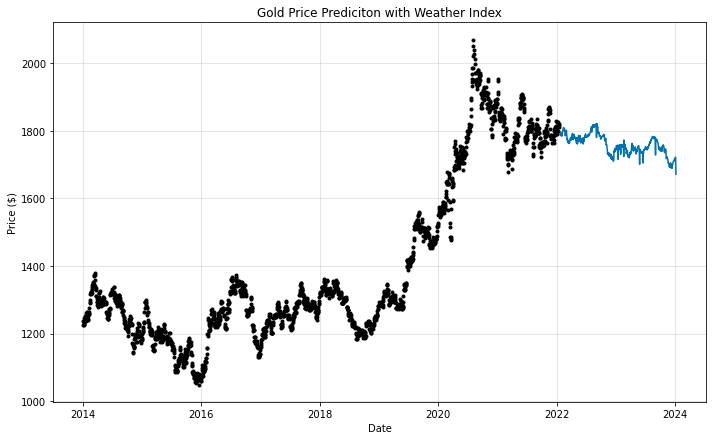

In [18]:
goldfig3 = model_gold_multi.plot(forecast_gold_multi, uncertainty=False, xlabel = "Date", ylabel = "Price ($)")
goldax3 = goldfig3.get_axes()
goldax3[0].set_title("Gold Price Prediciton with Weather Index")

D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Text(0.5, 1.0, 'Component graphs for Gold Price Prediciton with Weather Index')

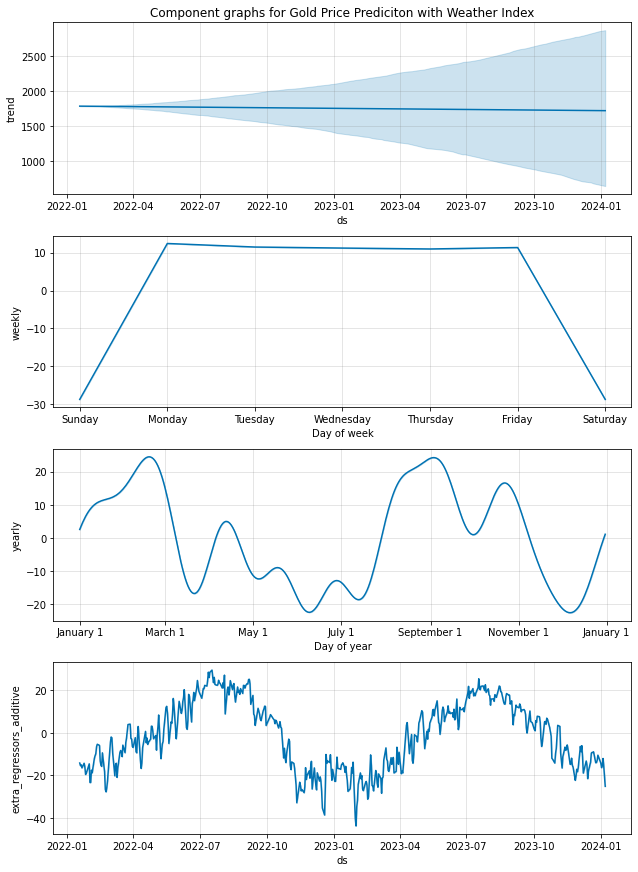

In [19]:
goldfig4 = model_gold_multi.plot_components(forecast_gold_multi)
goldax4 = goldfig4.get_axes()
goldax4[0].set_title("Component graphs for Gold Price Prediciton with Weather Index")

### FB Prophet of Silver with and without multivariate weather index

In [20]:
#silver train and silver test
silver.rename(columns = {'Price':'y','Date':'ds'}, inplace = True)
silver_train = silver[:int(0.8*len(silver))]
silver_test = silver[int(0.8*len(silver)):]

In [21]:
model_silver_single = Prophet(interval_width = 0.9)
model_silver_single.fit(silver_train)

silver_single_test_feed = silver_test[['ds']]
forecast_silver_single = model_silver_single.predict(silver_single_test_feed)
forecast_silver_single2 = forecast_silver_single [['ds', 'yhat']]

final_silver_single = forecast_silver_single2.merge(silver_test, how = 'left')

mape_silver_single = mape(final_silver_single.y, final_silver_single.yhat)
mae_silver_single = mae(final_silver_single.y, final_silver_single.yhat)
print("silver_single mape error:", mape_silver_single)
print("silver_single mae error:", mae_silver_single)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


silver_single mape error: 0.35866452852915753
silver_single mae error: 7.917143558046492


Text(0.5, 1.0, 'silver Price Prediciton without Weather Index')

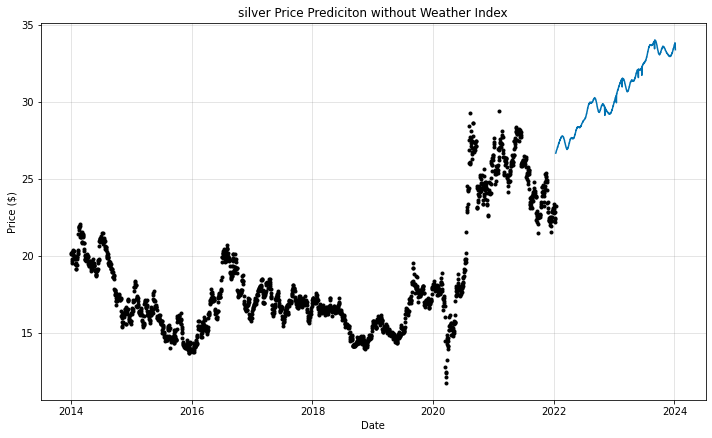

In [22]:
silverfig1 = model_silver_single.plot(forecast_silver_single, uncertainty=False, xlabel = "Date", ylabel = "Price ($)")
silverax1 = silverfig1.get_axes()
silverax1[0].set_title("silver Price Prediciton without Weather Index")

D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Text(0.5, 1.0, 'Component graphs for silver Price Prediciton without Weather Index')

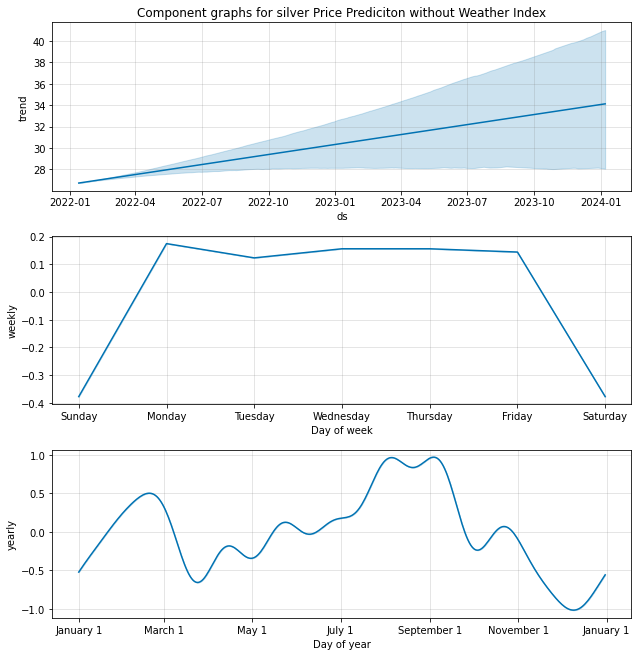

In [23]:
silverfig2 = model_silver_single.plot_components(forecast_silver_single)
silverax2 = silverfig2.get_axes()
silverax2[0].set_title("Component graphs for silver Price Prediciton without Weather Index")

In [24]:
model_silver_multi = Prophet(interval_width = 0.9)
model_silver_multi.add_regressor('PRCP', standardize = True)
model_silver_multi.add_regressor('TMAX', standardize = True)
model_silver_multi.add_regressor('TMIN', standardize = True)
model_silver_multi.fit(silver_train)

silver_multi_test_feed = silver_test[['ds', 'PRCP', 'TMAX', 'TMIN']]
forecast_silver_multi = model_silver_multi.predict(silver_multi_test_feed)
forecast_silver_multi2 = forecast_silver_multi [['ds', 'yhat']]

final_silver_multi = forecast_silver_multi2.merge(silver_test, how = 'left')

mape_silver_multi = mape(final_silver_multi.y, final_silver_multi.yhat)
mae_silver_multi = mae(final_silver_multi.y, final_silver_multi.yhat)
print("silver_multi mape error:", mape_silver_multi)
print("silver_multi mae error:", mae_silver_multi)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


silver_multi mape error: 0.3570896145665602
silver_multi mae error: 7.881858555768414


Text(0.5, 1.0, 'silver Price Prediciton with Weather Index')

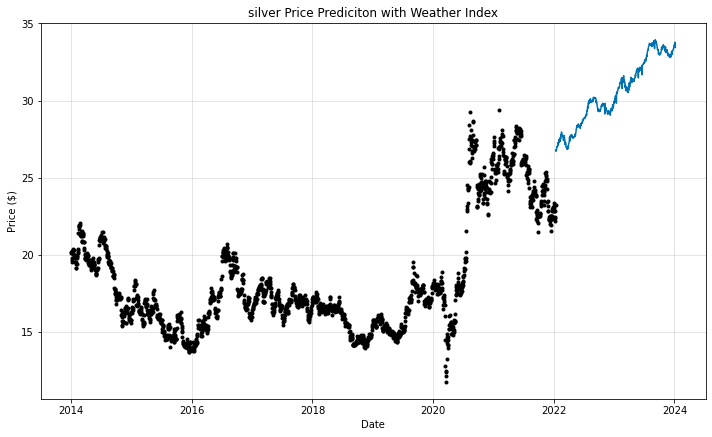

In [25]:
silverfig3 = model_silver_multi.plot(forecast_silver_multi, uncertainty=False, xlabel = "Date", ylabel = "Price ($)")
silverax3 = silverfig3.get_axes()
silverax3[0].set_title("silver Price Prediciton with Weather Index")

D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Text(0.5, 1.0, 'Component graphs for silver Price Prediciton with Weather Index')

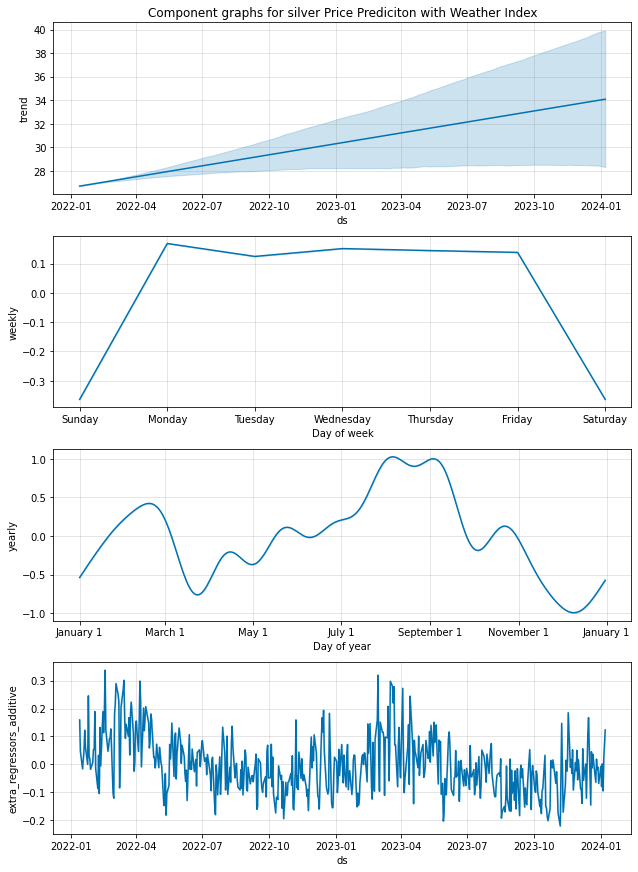

In [26]:
silverfig4 = model_silver_multi.plot_components(forecast_silver_multi)
silverax4 = silverfig4.get_axes()
silverax4[0].set_title("Component graphs for silver Price Prediciton with Weather Index")

# Coffee vs. Cocoa

### Coffee price with respect to Hawaii Weather Index

In [27]:
df_coffee = pd.read_csv("coffee-prices-historical-chart-data.csv", header =8)
df_coffee['date'] = pd.to_datetime(df_coffee['date'])
df_coffee =df_coffee.loc[(df_coffee['date'] >= '2014-01-01')]
df_coffee =df_coffee.loc[(df_coffee['date'] <= '2023-11-01')]
df_coffee.reset_index(drop = True, inplace = True)

df_coffee['Change %'] = df_coffee[' value'].pct_change()*100
df_coffee = df_coffee[df_coffee.notnull().all(axis=1)]
df_coffee = df_coffee.rename(columns={' value':'Price', 'date': 'Date'})
df_coffee['Price']=df_coffee['Price'].astype(float)
df_coffee['Change %']=df_coffee['Change %'].astype(float)
df_coffee


Date   Price  Change %
1    2014-01-03  1.1635  4.443447
2    2014-01-06  1.2100  3.996562
3    2014-01-07  1.1725 -3.099174
4    2014-01-08  1.2090  3.113006
5    2014-01-09  1.1935 -1.282051
...         ...     ...       ...
2502 2023-10-26  1.6089 -0.093145
2503 2023-10-27  1.5985 -0.646404
2504 2023-10-30  1.5822 -1.019706
2505 2023-10-31  1.6453  3.988118
2506 2023-11-01  1.5948 -3.069349

[2506 rows x 3 columns]

In [28]:
df_3574630 = pd.read_csv("3574630.csv")
df_3574630 = df_3574630[df_3574630.notnull().all(axis=1)]
df_3574630 = df_3574630.loc[df_3574630['STATION'] == 'USW00022516']

df_3574633 = pd.read_csv("3574633.csv")
df_3574633 = df_3574633[df_3574633.notnull().all(axis=1)]
df_3574633 = df_3574633.loc[df_3574633['STATION'] == 'USW00022516']

df_Hawaii = pd.concat([df_3574630, df_3574633])
df_Hawaii.reset_index(drop = True, inplace = True)
df_Hawaii = df_Hawaii[['DATE', 'PRCP', 'TMAX', 'TMIN']]
df_Hawaii['DATE'] = pd.to_datetime(df_Hawaii['DATE'])

df_Hawaii

DATE  PRCP  TMAX  TMIN
0    2014-01-01   0.0  27.8  17.2
1    2014-01-02   0.3  28.3  18.3
2    2014-01-03  24.1  27.2  20.6
3    2014-01-04   0.0  26.7  19.4
4    2014-01-05   0.0  26.1  17.2
...         ...   ...   ...   ...
3646 2024-01-10   1.0  27.2  20.6
3647 2024-01-11   1.8  26.1  18.9
3648 2024-01-12   0.8  25.0  16.1
3649 2024-01-13   0.3  25.0  16.1
3650 2024-01-14   0.0  26.7  12.8

[3651 rows x 4 columns]

In [29]:
coffee = df_coffee.set_index("Date").join(df_Hawaii.set_index('DATE'))
coffee.reset_index(inplace = True, drop = False)
coffee = coffee.interpolate(method = 'ffill')
coffee

Date   Price  Change %  PRCP  TMAX  TMIN
0    2014-01-03  1.1635  4.443447  24.1  27.2  20.6
1    2014-01-06  1.2100  3.996562   0.0  26.1  17.8
2    2014-01-07  1.1725 -3.099174   1.0  26.7  18.3
3    2014-01-08  1.2090  3.113006   1.5  26.1  16.7
4    2014-01-09  1.1935 -1.282051   0.0  27.8  13.9
...         ...     ...       ...   ...   ...   ...
2501 2023-10-26  1.6089 -0.093145   0.0  31.7   7.8
2502 2023-10-27  1.5985 -0.646404   0.0  32.2  19.4
2503 2023-10-30  1.5822 -1.019706   0.0  30.0  17.8
2504 2023-10-31  1.6453  3.988118   0.0  30.0  17.8
2505 2023-11-01  1.5948 -3.069349   0.0  30.6  18.3

[2506 rows x 6 columns]

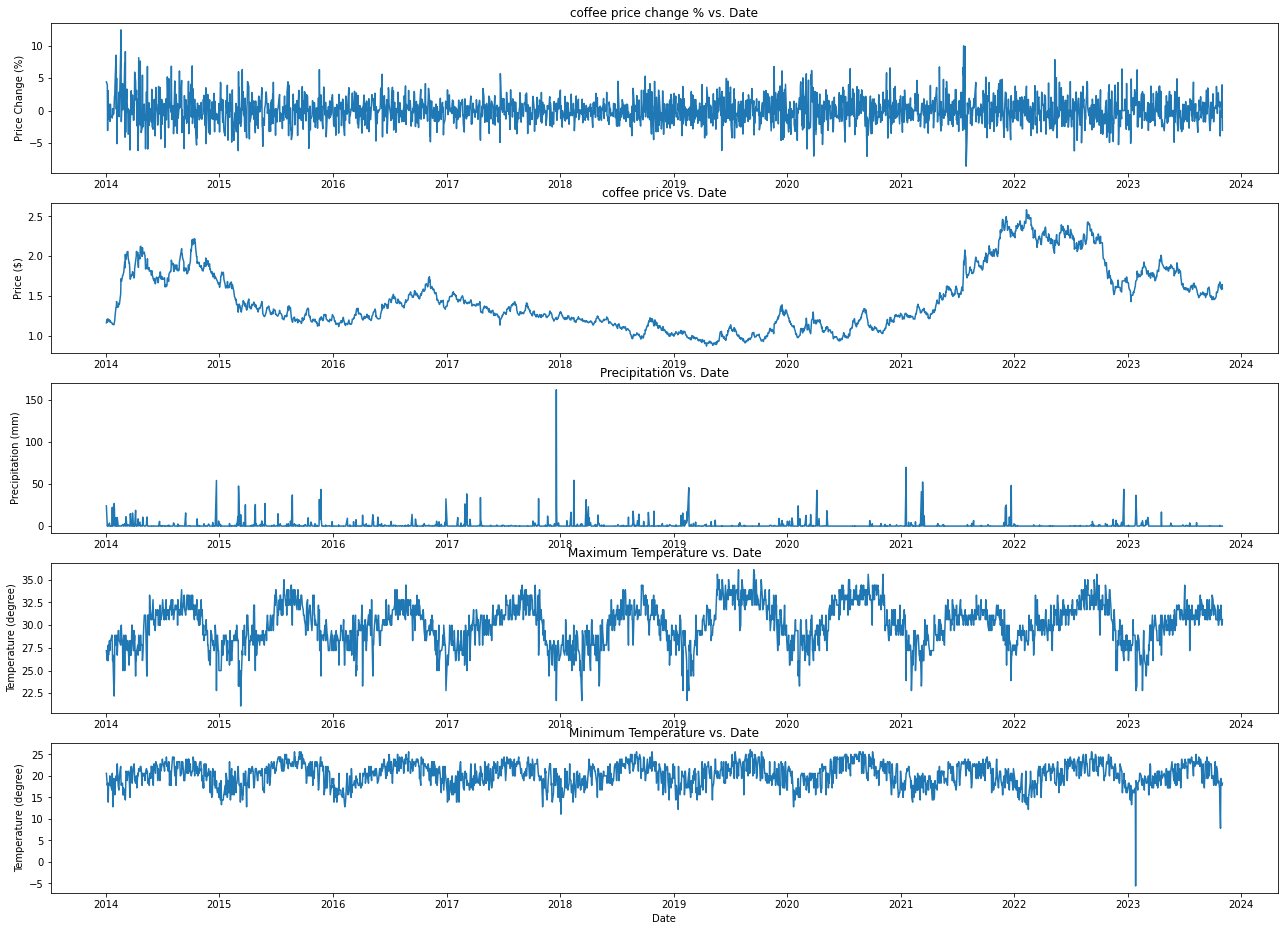

In [30]:
plt.figure(figsize=(22,16))
plt.subplot(511)
plt.plot(coffee['Date'],coffee['Change %'])
plt.title("coffee price change % vs. Date")
plt.ylabel("Price Change (%)")

plt.subplot(512)
plt.plot(coffee['Date'],coffee['Price'])
plt.title("coffee price vs. Date")
plt.ylabel("Price ($)")

plt.subplot(513)
plt.plot(coffee['Date'],coffee['PRCP'])
plt.title("Precipitation vs. Date")
plt.ylabel("Precipitation (mm)")

plt.subplot(514)
plt.plot(coffee['Date'],coffee['TMAX'])
plt.title("Maximum Temperature vs. Date")
plt.ylabel("Temperature (degree)")

plt.subplot(515)
plt.plot(coffee['Date'],coffee['TMIN'])
plt.title("Minimum Temperature vs. Date")
plt.ylabel("Temperature (degree)")
plt.xlabel("Date")

plt.show()


D:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


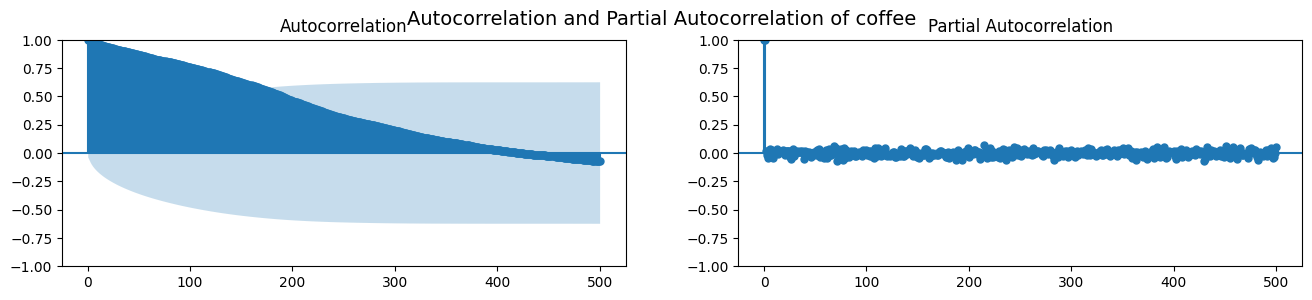

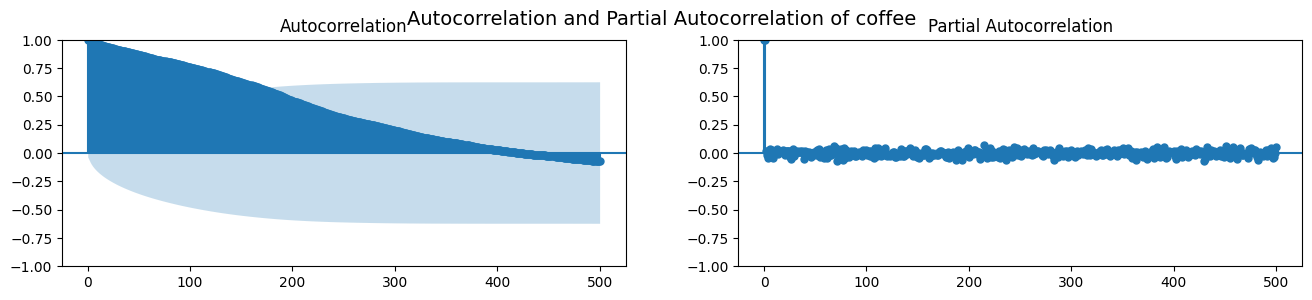

In [31]:
#Autocorrelation and Partial Autocorrelation Graphs
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
fig.suptitle("Autocorrelation and Partial Autocorrelation of coffee", fontsize=14)
plot_acf(coffee['Price'].tolist(), lags=500, ax=axes[0])
plot_pacf(coffee['Price'].tolist(), lags=500, ax=axes[1])

### Cocoa price with respect to Hawaii Weather Index

In [32]:
df_cocoa = pd.read_csv("US Cocoa Futures Historical Data.csv")
df_cocoa.sort_values(by = ['Date'], inplace = True)
df_cocoa.reset_index(drop = True, inplace = True)
df_cocoa['Date'] = pd.to_datetime(df_cocoa['Date'])
df_cocoa = df_cocoa[['Date', 'Price', 'Change %']]
df_cocoa = df_cocoa.replace(',','', regex=True)
df_cocoa = df_cocoa.replace('%','', regex=True)
df_cocoa['Price']=df_cocoa['Price'].astype(float)
df_cocoa['Change %']=df_cocoa['Change %'].astype(float)
df_cocoa

Date   Price  Change %
0    2014-01-01  2707.5     -0.06
1    2014-01-02  2636.0     -2.64
2    2014-01-03  2699.0      2.39
3    2014-01-06  2667.0     -1.19
4    2014-01-07  2675.0      0.30
...         ...     ...       ...
2522 2023-12-29  4196.0     -1.41
2523 2024-01-02  4275.0      1.88
2524 2024-01-03  4238.0     -0.87
2525 2024-01-04  4260.0      0.52
2526 2024-01-05  4204.0     -1.31

[2527 rows x 3 columns]

In [33]:
df_3574630 = pd.read_csv("3574630.csv")
df_3574630 = df_3574630[df_3574630.notnull().all(axis=1)]
df_3574630 = df_3574630.loc[df_3574630['STATION'] == 'USW00022516']

df_3574633 = pd.read_csv("3574633.csv")
df_3574633 = df_3574633[df_3574633.notnull().all(axis=1)]
df_3574633 = df_3574633.loc[df_3574633['STATION'] == 'USW00022516']

df_Hawaii = pd.concat([df_3574630, df_3574633])
df_Hawaii.reset_index(drop = True, inplace = True)
df_Hawaii = df_Hawaii[['DATE', 'PRCP', 'TMAX', 'TMIN']]
df_Hawaii['DATE'] = pd.to_datetime(df_Hawaii['DATE'])

df_Hawaii

DATE  PRCP  TMAX  TMIN
0    2014-01-01   0.0  27.8  17.2
1    2014-01-02   0.3  28.3  18.3
2    2014-01-03  24.1  27.2  20.6
3    2014-01-04   0.0  26.7  19.4
4    2014-01-05   0.0  26.1  17.2
...         ...   ...   ...   ...
3646 2024-01-10   1.0  27.2  20.6
3647 2024-01-11   1.8  26.1  18.9
3648 2024-01-12   0.8  25.0  16.1
3649 2024-01-13   0.3  25.0  16.1
3650 2024-01-14   0.0  26.7  12.8

[3651 rows x 4 columns]

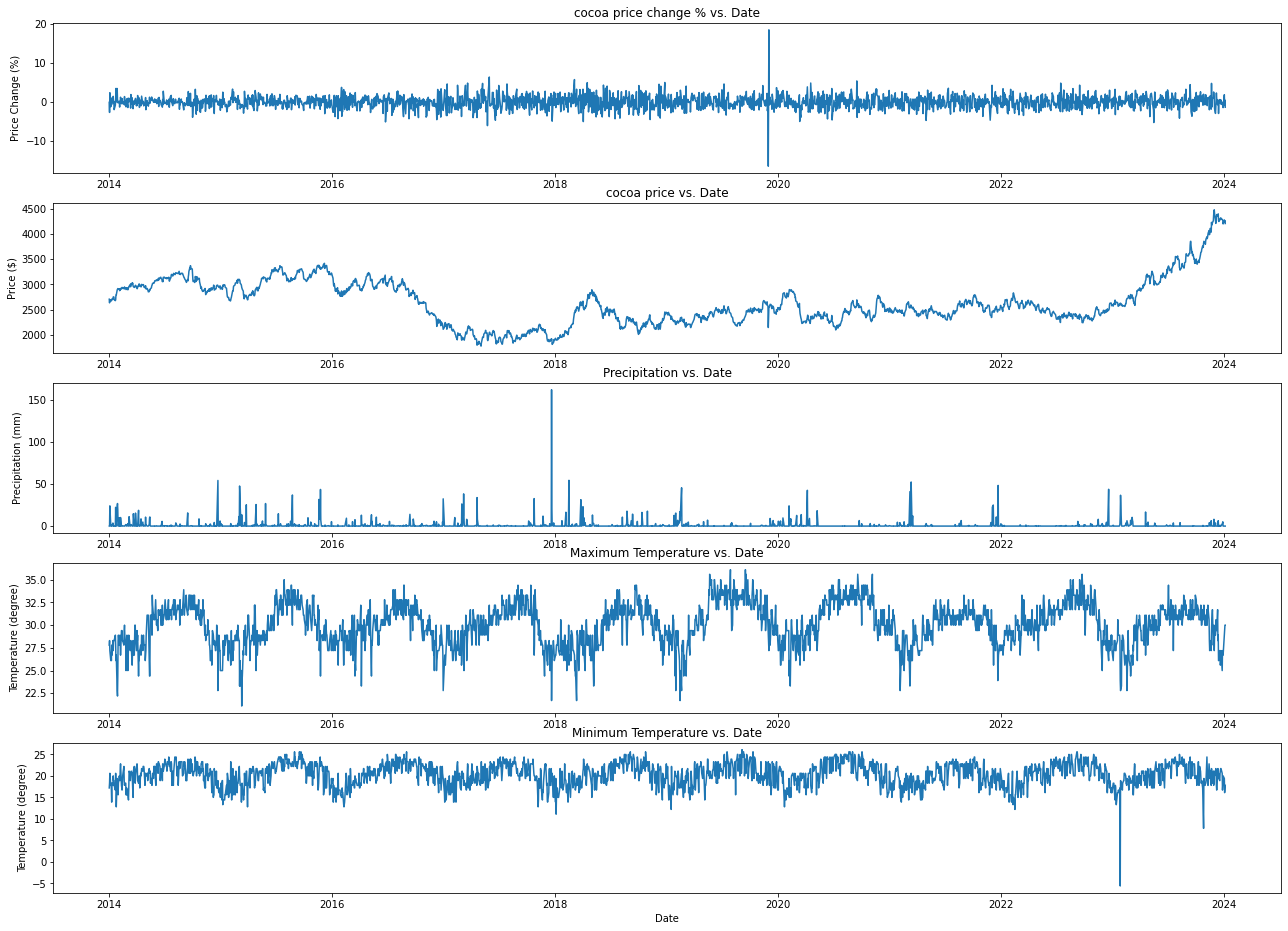

In [34]:
cocoa = df_cocoa.set_index("Date").join(df_Hawaii.set_index('DATE'))
cocoa.reset_index(inplace = True, drop = False)
cocoa = cocoa.interpolate(method = 'ffill')

plt.figure(figsize=(22,16))
plt.subplot(511)
plt.plot(cocoa['Date'],cocoa['Change %'])
plt.title("cocoa price change % vs. Date")
plt.ylabel("Price Change (%)")

plt.subplot(512)
plt.plot(cocoa['Date'],cocoa['Price'])
plt.title("cocoa price vs. Date")
plt.ylabel("Price ($)")

plt.subplot(513)
plt.plot(cocoa['Date'],cocoa['PRCP'])
plt.title("Precipitation vs. Date")
plt.ylabel("Precipitation (mm)")

plt.subplot(514)
plt.plot(cocoa['Date'],cocoa['TMAX'])
plt.title("Maximum Temperature vs. Date")
plt.ylabel("Temperature (degree)")

plt.subplot(515)
plt.plot(cocoa['Date'],cocoa['TMIN'])
plt.title("Minimum Temperature vs. Date")
plt.ylabel("Temperature (degree)")
plt.xlabel("Date")

plt.show()


D:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


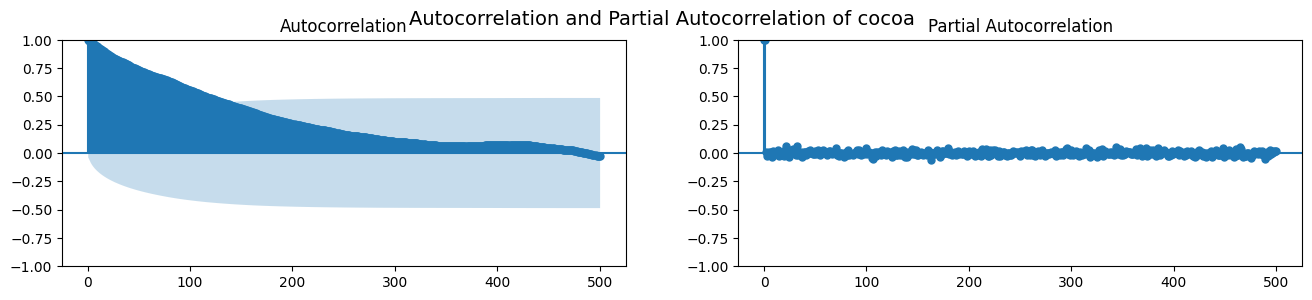

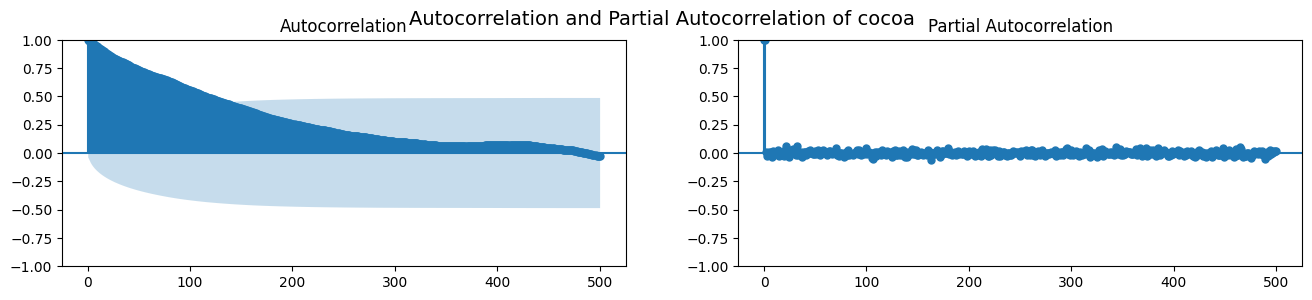

In [35]:
#Autocorrelation and Partial Autocorrelation Graphs
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
fig.suptitle("Autocorrelation and Partial Autocorrelation of cocoa", fontsize=14)
plot_acf(cocoa['Price'].tolist(), lags=500, ax=axes[0])
plot_pacf(cocoa['Price'].tolist(), lags=500, ax=axes[1])

## Coffee and Cocoa Analysis

In [36]:
corr_coffee_cocoa = df_coffee[['Date', 'Price', 'Change %']].set_index("Date").join(df_cocoa[['Date', 'Price', 'Change %']].set_index('Date'), lsuffix = '_coffee', rsuffix = '_cocoa')
corr_matrix_cc = corr_coffee_cocoa.corr()

print("Correlation matrix between Coffee and Cocoa:")
print(corr_matrix_cc)

Correlation matrix between Coffee and Cocoa:
                 Price_coffee  Change %_coffee  Price_cocoa  Change %_cocoa
Price_coffee         1.000000         0.040225     0.219454       -0.000406
Change %_coffee      0.040225         1.000000     0.014224        0.129634
Price_cocoa          0.219454         0.014224     1.000000        0.057508
Change %_cocoa      -0.000406         0.129634     0.057508        1.000000


### FB prophet of Coffee with and without multivariate weather index

In [37]:
#coffee train and coffee test

coffee.rename(columns = {'Price':'y','Date':'ds'}, inplace = True)
coffee_train = coffee[:int(0.8*len(coffee))]
coffee_test = coffee[int(0.8*len(coffee)):]

In [38]:
model_coffee_single = Prophet(interval_width = 0.9)
model_coffee_single.fit(coffee_train)

coffee_single_test_feed = coffee_test[['ds']]
forecast_coffee_single = model_coffee_single.predict(coffee_single_test_feed)
forecast_coffee_single2 = forecast_coffee_single [['ds', 'yhat']]

final_coffee_single = forecast_coffee_single2.merge(coffee_test, how = 'left')

mape_coffee_single = mape(final_coffee_single.y, final_coffee_single.yhat)
mae_coffee_single = mae(final_coffee_single.y, final_coffee_single.yhat)
print("coffee_single mape error:", mape_coffee_single)
print("coffee_single mae error:", mae_coffee_single)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


coffee_single mape error: 0.3721895675212116
coffee_single mae error: 0.6445010842158636


Text(0.5, 1.0, 'coffee Price Prediciton without Weather Index')

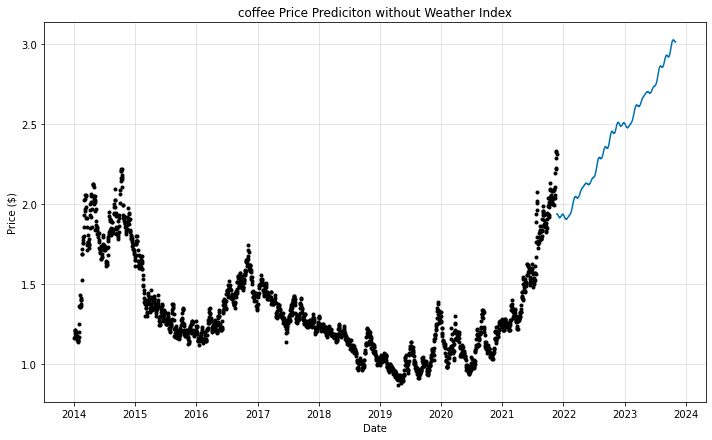

In [39]:
coffeefig1 = model_coffee_single.plot(forecast_coffee_single, uncertainty=False, xlabel = "Date", ylabel = "Price ($)")
coffeeax1 = coffeefig1.get_axes()
coffeeax1[0].set_title("coffee Price Prediciton without Weather Index")

D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Text(0.5, 1.0, 'Component graphs for coffee Price Prediciton without Weather Index')

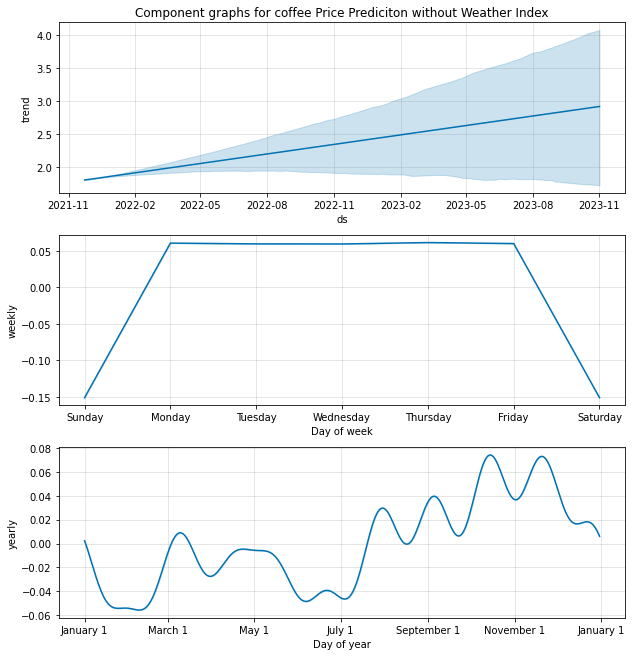

In [40]:
coffeefig2 = model_coffee_single.plot_components(forecast_coffee_single)
coffeeax2 = coffeefig2.get_axes()
coffeeax2[0].set_title("Component graphs for coffee Price Prediciton without Weather Index")

In [41]:
model_coffee_multi = Prophet(interval_width = 0.9)
model_coffee_multi.add_regressor('PRCP', standardize = True)
model_coffee_multi.add_regressor('TMAX', standardize = True)
model_coffee_multi.add_regressor('TMIN', standardize = True)
model_coffee_multi.fit(coffee_train)

coffee_multi_test_feed = coffee_test[['ds', 'PRCP', 'TMAX', 'TMIN']]
forecast_coffee_multi = model_coffee_multi.predict(coffee_multi_test_feed)
forecast_coffee_multi2 = forecast_coffee_multi [['ds', 'yhat']]

final_coffee_multi = forecast_coffee_multi2.merge(coffee_test, how = 'left')

mape_coffee_multi = mape(final_coffee_multi.y, final_coffee_multi.yhat)
mae_coffee_multi = mae(final_coffee_multi.y, final_coffee_multi.yhat)
print("coffee_multi mape error:", mape_coffee_multi)
print("coffee_multi mae error:", mae_coffee_multi)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


coffee_multi mape error: 0.3744398798383418
coffee_multi mae error: 0.6483007185735208


Text(0.5, 1.0, 'coffee Price Prediciton with Weather Index')

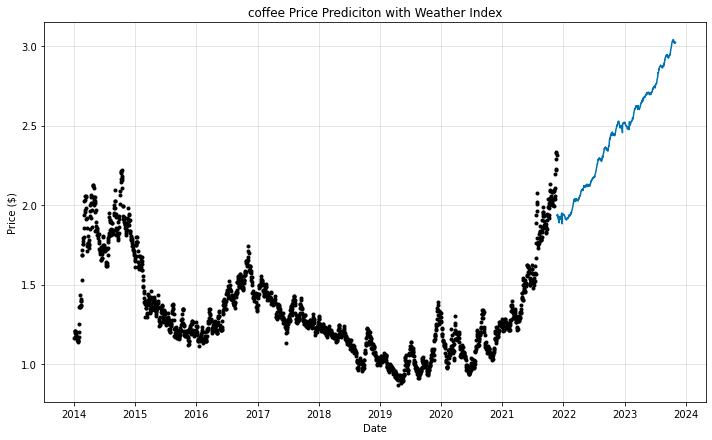

In [42]:
coffeefig3 = model_coffee_multi.plot(forecast_coffee_multi, uncertainty=False, xlabel = "Date", ylabel = "Price ($)")
coffeeax3 = coffeefig3.get_axes()
coffeeax3[0].set_title("coffee Price Prediciton with Weather Index")

D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Text(0.5, 1.0, 'Component graphs for coffee Price Prediciton with Weather Index')

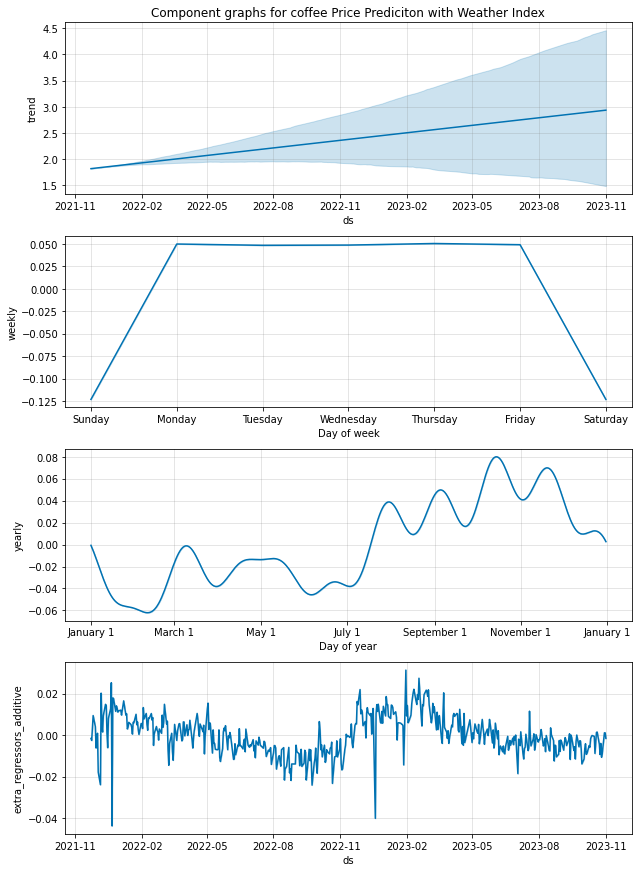

In [43]:
coffeefig4 = model_coffee_multi.plot_components(forecast_coffee_multi)
coffeeax4 = coffeefig4.get_axes()
coffeeax4[0].set_title("Component graphs for coffee Price Prediciton with Weather Index")

### FB prophet of Cocoa with and without multivariate weather index

In [44]:
#cocoa train and cocoa test
cocoa.rename(columns = {'Price':'y','Date':'ds'}, inplace = True)
cocoa_train = cocoa[:int(0.8*len(cocoa))]
cocoa_test = cocoa[int(0.8*len(cocoa)):]

In [45]:
model_cocoa_single = Prophet(interval_width = 0.9)
model_cocoa_single.fit(cocoa_train)

cocoa_single_test_feed = cocoa_test[['ds']]
forecast_cocoa_single = model_cocoa_single.predict(cocoa_single_test_feed)
forecast_cocoa_single2 = forecast_cocoa_single [['ds', 'yhat']]

final_cocoa_single = forecast_cocoa_single2.merge(cocoa_test, how = 'left')

mape_cocoa_single = mape(final_cocoa_single.y, final_cocoa_single.yhat)
mae_cocoa_single = mae(final_cocoa_single.y, final_cocoa_single.yhat)
print("cocoa_single mape error:", mape_cocoa_single)
print("cocoa_single mae error:", mae_cocoa_single)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


cocoa_single mape error: 0.1277240822991868
cocoa_single mae error: 423.25110457377394


Text(0.5, 1.0, 'cocoa Price Prediciton without Weather Index')

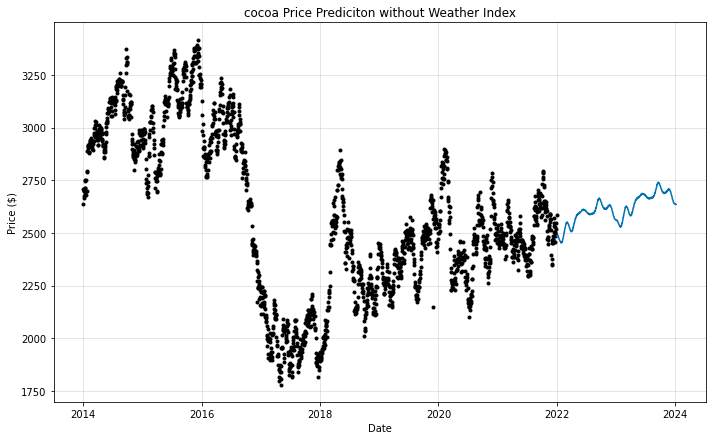

In [46]:
cocoafig1 = model_cocoa_single.plot(forecast_cocoa_single, uncertainty=False, xlabel = "Date", ylabel = "Price ($)")
cocoaax1 = cocoafig1.get_axes()
cocoaax1[0].set_title("cocoa Price Prediciton without Weather Index")

D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Text(0.5, 1.0, 'Component graphs for cocoa Price Prediciton without Weather Index')

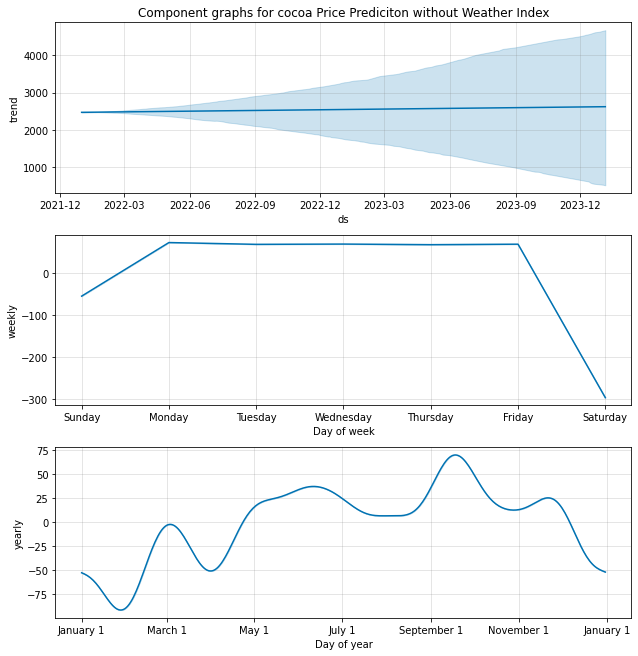

In [47]:
cocoafig2 = model_cocoa_single.plot_components(forecast_cocoa_single)
cocoaax2 = cocoafig2.get_axes()
cocoaax2[0].set_title("Component graphs for cocoa Price Prediciton without Weather Index")

In [48]:
model_cocoa_multi = Prophet(interval_width = 0.9)
model_cocoa_multi.add_regressor('PRCP', standardize = True)
model_cocoa_multi.add_regressor('TMAX', standardize = True)
model_cocoa_multi.add_regressor('TMIN', standardize = True)
model_cocoa_multi.fit(cocoa_train)

cocoa_multi_test_feed = cocoa_test[['ds', 'PRCP', 'TMAX', 'TMIN']]
forecast_cocoa_multi = model_cocoa_multi.predict(cocoa_multi_test_feed)
forecast_cocoa_multi2 = forecast_cocoa_multi [['ds', 'yhat']]

final_cocoa_multi = forecast_cocoa_multi2.merge(cocoa_test, how = 'left')

mape_cocoa_multi = mape(final_cocoa_multi.y, final_cocoa_multi.yhat)
mae_cocoa_multi = mae(final_cocoa_multi.y, final_cocoa_multi.yhat)
print("cocoa_multi mape error:", mape_cocoa_multi)
print("cocoa_multi mae error:", mae_cocoa_multi)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


cocoa_multi mape error: 0.12810441667327993
cocoa_multi mae error: 424.8148528481467


Text(0.5, 1.0, 'cocoa Price Prediciton with Weather Index')

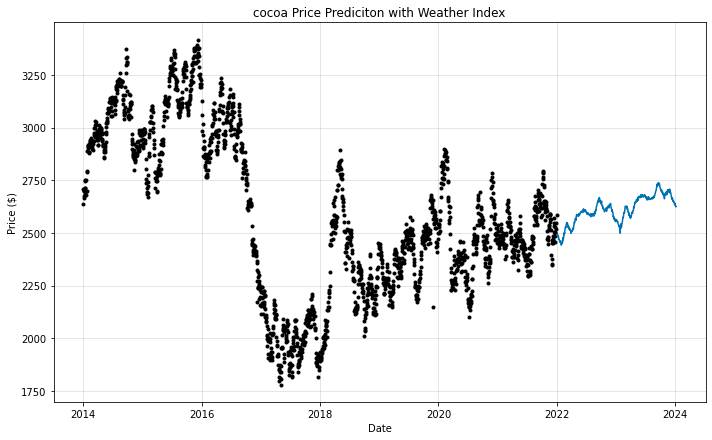

In [49]:
cocoafig3 = model_cocoa_multi.plot(forecast_cocoa_multi, uncertainty=False, xlabel = "Date", ylabel = "Price ($)")
cocoaax3 = cocoafig3.get_axes()
cocoaax3[0].set_title("cocoa Price Prediciton with Weather Index")

D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Text(0.5, 1.0, 'Component graphs for cocoa Price Prediciton with Weather Index')

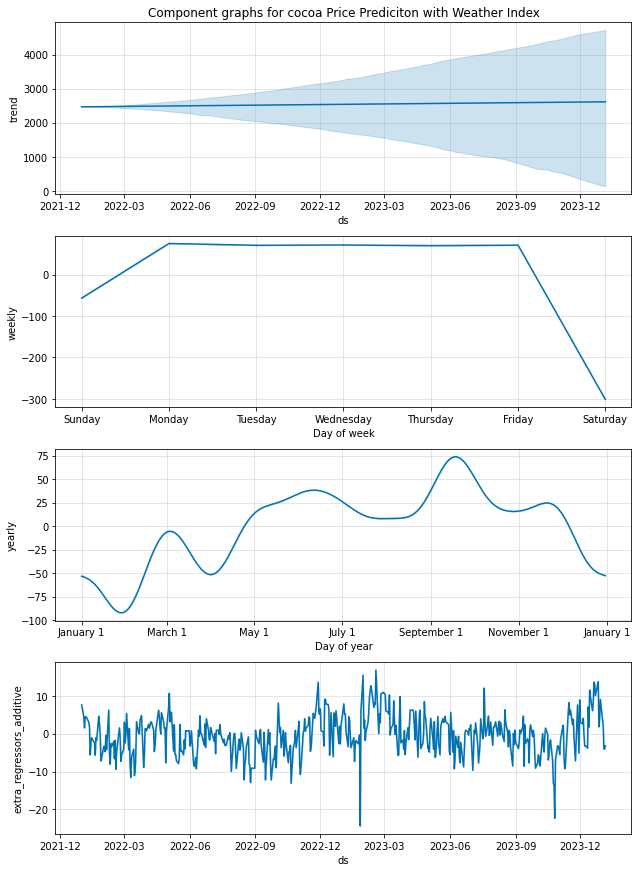

In [50]:
cocoafig4 = model_cocoa_multi.plot_components(forecast_cocoa_multi)
cocoaax4 = cocoafig4.get_axes()
cocoaax4[0].set_title("Component graphs for cocoa Price Prediciton with Weather Index")

# Wheat vs. Soybean

### Wheat price with respect to Kansas Weather Index

In [51]:
df_wheat = pd.read_csv("wheat-prices-historical-chart-data.csv", header = 8)
df_wheat['date'] = pd.to_datetime(df_wheat['date'])
df_wheat =df_wheat.loc[(df_wheat['date'] >= '2014-01-01')]
df_wheat.reset_index(drop = True, inplace = True)
df_wheat['Change %'] = df_wheat[' value'].pct_change()*100
df_wheat = df_wheat[df_wheat.notnull().all(axis=1)]
df_wheat = df_wheat.rename(columns={' value':'Price', 'date': 'Date'})
df_wheat['Price']=df_wheat['Price'].astype(float)
df_wheat['Change %']=df_wheat['Change %'].astype(float)

df_wheat

Date   Price  Change %
1    2014-01-03  6.0575  1.465662
2    2014-01-06  6.0575  0.000000
3    2014-01-07  6.0250 -0.536525
4    2014-01-08  5.8875 -2.282158
5    2014-01-09  5.8425 -0.764331
...         ...     ...       ...
2536 2024-01-01  6.6952  0.064266
2537 2024-01-02  6.5732 -1.822201
2538 2024-01-03  6.5178 -0.842816
2539 2024-01-04  6.5860  1.046365
2540 2024-01-05  6.5812 -0.072882

[2540 rows x 3 columns]

In [52]:
df_3574610 = pd.read_csv("3574610.csv")
df_3574610 = df_3574610[df_3574610.notnull().all(axis=1)]
df_3574610 = df_3574610.loc[df_3574610['STATION'] == 'USW00013988']

df_3574614 = pd.read_csv("3574614.csv")
df_3574614 = df_3574614[df_3574614.notnull().all(axis=1)]
df_3574614 = df_3574614.loc[df_3574614['STATION'] == 'USW00013988']

df_Kansas = pd.concat([df_3574610, df_3574614])
df_Kansas.reset_index(drop = True, inplace = True)
df_Kansas = df_Kansas[['DATE', 'PRCP', 'TMAX', 'TMIN']]
df_Kansas['DATE'] = pd.to_datetime(df_Kansas['DATE'])

df_Kansas = df_Kansas.interpolate(method = 'ffill')

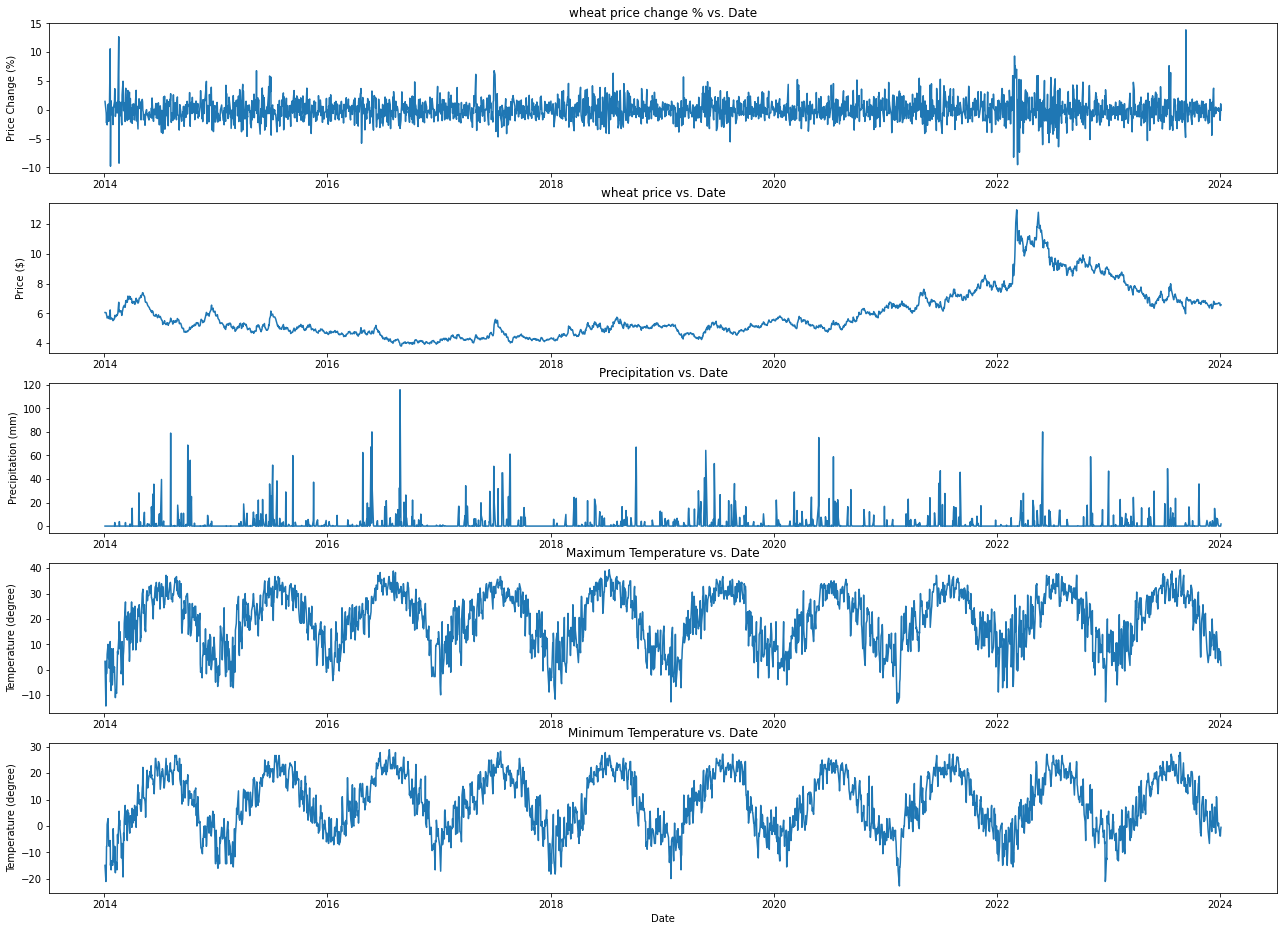

In [53]:
wheat = df_wheat.set_index("Date").join(df_Kansas.set_index('DATE'))
wheat.reset_index(inplace = True, drop = False)
wheat = wheat.interpolate(method = 'ffill')


plt.figure(figsize=(22,16))
plt.subplot(511)
plt.plot(wheat['Date'],wheat['Change %'])
plt.title("wheat price change % vs. Date")
plt.ylabel("Price Change (%)")

plt.subplot(512)
plt.plot(wheat['Date'],wheat['Price'])
plt.title("wheat price vs. Date")
plt.ylabel("Price ($)")

plt.subplot(513)
plt.plot(wheat['Date'],wheat['PRCP'])
plt.title("Precipitation vs. Date")
plt.ylabel("Precipitation (mm)")

plt.subplot(514)
plt.plot(wheat['Date'],wheat['TMAX'])
plt.title("Maximum Temperature vs. Date")
plt.ylabel("Temperature (degree)")

plt.subplot(515)
plt.plot(wheat['Date'],wheat['TMIN'])
plt.title("Minimum Temperature vs. Date")
plt.ylabel("Temperature (degree)")
plt.xlabel("Date")

plt.show()


D:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


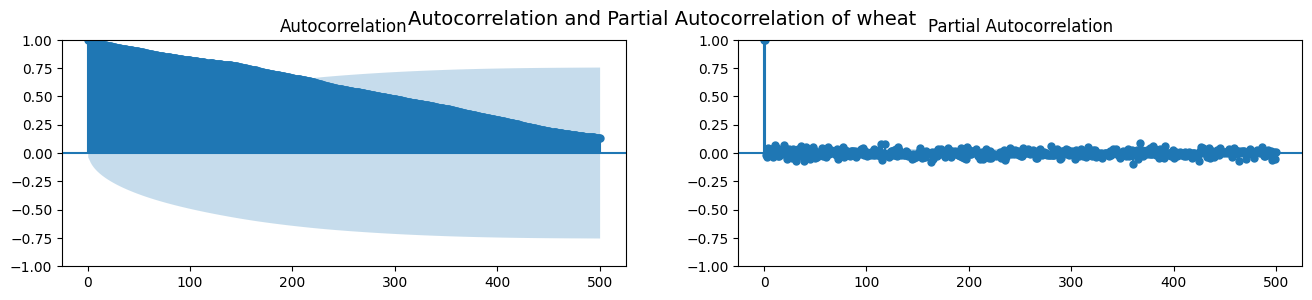

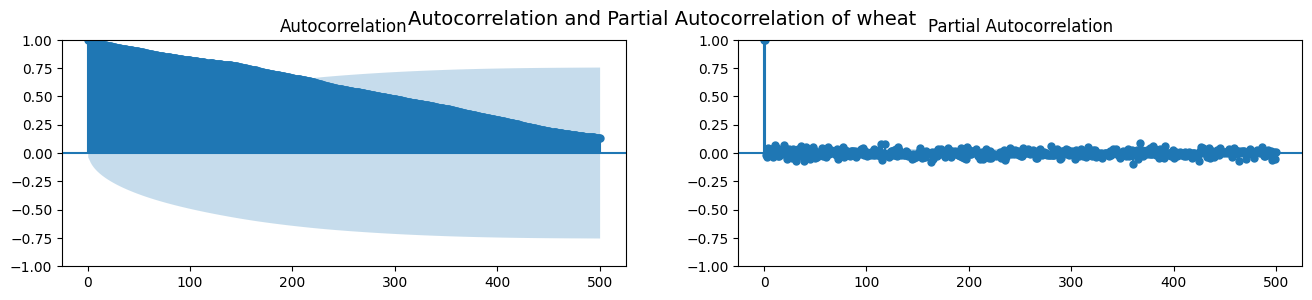

In [54]:
#Autocorrelation and Partial Autocorrelation Graphs
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
fig.suptitle("Autocorrelation and Partial Autocorrelation of wheat", fontsize=14)
plot_acf(wheat['Price'].tolist(), lags=500, ax=axes[0])
plot_pacf(wheat['Price'].tolist(), lags=500, ax=axes[1])

### Soybean price with respect to Illinois Weather Index

In [55]:
df_soy = pd.read_csv("soybean-prices-historical-chart-data.csv", header = 8)
df_soy['date'] = pd.to_datetime(df_soy['date'])
df_soy =df_soy.loc[(df_soy['date'] >= '2014-01-01')]
df_soy.reset_index(drop = True, inplace = True)
df_soy['Change %'] = df_soy[' value'].pct_change()*100
df_soy = df_soy[df_soy.notnull().all(axis=1)]
df_soy = df_soy.rename(columns={' value':'Price', 'date': 'Date'})
df_soy['Price']=df_soy['Price'].astype(float)
df_soy['Change %']=df_soy['Change %'].astype(float)
df_soy

Date    Price  Change %
1    2014-01-03  12.7125  0.098425
2    2014-01-06  12.7675  0.432645
3    2014-01-07  12.7600 -0.058743
4    2014-01-08  12.6925 -0.528997
5    2014-01-09  12.7375  0.354540
...         ...      ...       ...
2534 2024-01-01  12.9200  0.000000
2535 2024-01-02  12.7400 -1.393189
2536 2024-01-03  12.6900 -0.392465
2537 2024-01-04  12.6400 -0.394011
2538 2024-01-05  12.5000 -1.107595

[2538 rows x 3 columns]

In [56]:
df_3574621 = pd.read_csv("3574621.csv")
df_3574621 = df_3574621[df_3574621.notnull().all(axis=1)]
df_3574621 = df_3574621.loc[df_3574621['STATION'] == 'USC00110338']

df_3574623 = pd.read_csv("3574623.csv")
df_3574623 = df_3574623[df_3574623.notnull().all(axis=1)]
df_3574623 = df_3574623.loc[df_3574623['STATION'] == 'USC00110338']

df_Illinois = pd.concat([df_3574621, df_3574623])
df_Illinois.reset_index(drop = True, inplace = True)
df_Illinois = df_Illinois[['DATE', 'PRCP', 'TMAX', 'TMIN']]
df_Illinois['DATE'] = pd.to_datetime(df_Illinois['DATE'])
df_Illinois

DATE  PRCP  TMAX  TMIN
0    2014-01-01   2.5  -9.4 -17.2
1    2014-01-02   7.4  -6.1 -10.0
2    2014-01-03   0.0  -8.9 -21.1
3    2014-01-04   0.0  -5.0 -21.1
4    2014-01-05   9.4  -0.6  -8.3
...         ...   ...   ...   ...
3645 2024-01-10  16.3   2.8  -1.1
3646 2024-01-11   0.0   1.1  -1.7
3647 2024-01-12   7.6   0.0  -3.9
3648 2024-01-13  10.2   1.7  -4.4
3649 2024-01-14  12.7  -4.4 -24.4

[3650 rows x 4 columns]

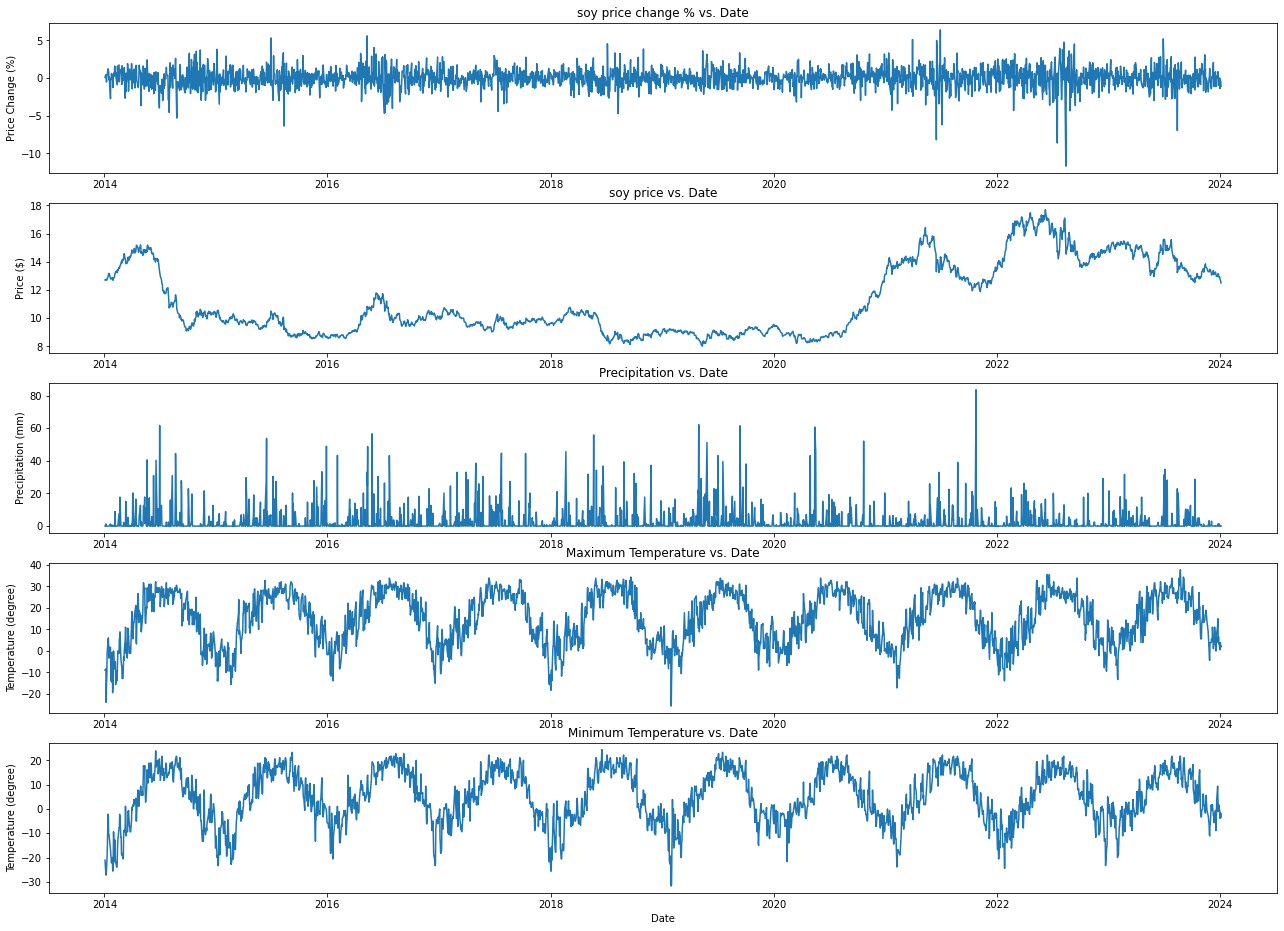

In [57]:
soy = df_soy.set_index("Date").join(df_Illinois.set_index('DATE'))
soy.reset_index(inplace = True, drop = False)
soy = soy.interpolate(method = 'ffill')


plt.figure(figsize=(22,16))
plt.subplot(511)
plt.plot(soy['Date'],soy['Change %'])
plt.title("soy price change % vs. Date")
plt.ylabel("Price Change (%)")

plt.subplot(512)
plt.plot(soy['Date'],soy['Price'])
plt.title("soy price vs. Date")
plt.ylabel("Price ($)")

plt.subplot(513)
plt.plot(soy['Date'],soy['PRCP'])
plt.title("Precipitation vs. Date")
plt.ylabel("Precipitation (mm)")

plt.subplot(514)
plt.plot(soy['Date'],soy['TMAX'])
plt.title("Maximum Temperature vs. Date")
plt.ylabel("Temperature (degree)")

plt.subplot(515)
plt.plot(soy['Date'],soy['TMIN'])
plt.title("Minimum Temperature vs. Date")
plt.ylabel("Temperature (degree)")
plt.xlabel("Date")

plt.show()


D:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


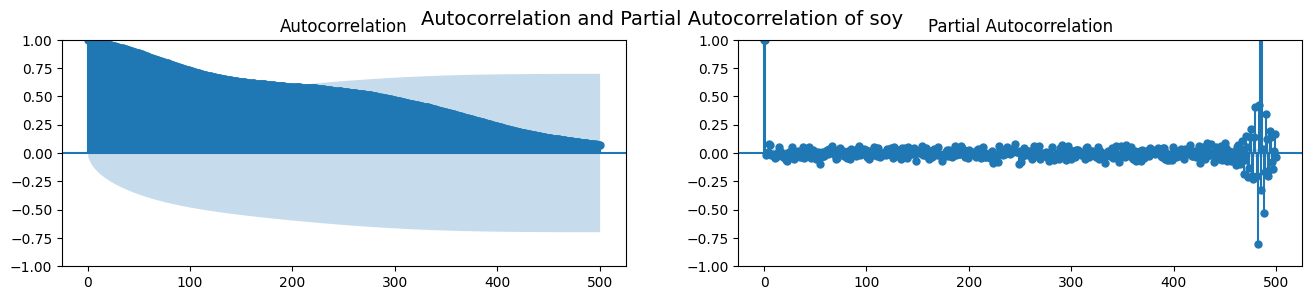

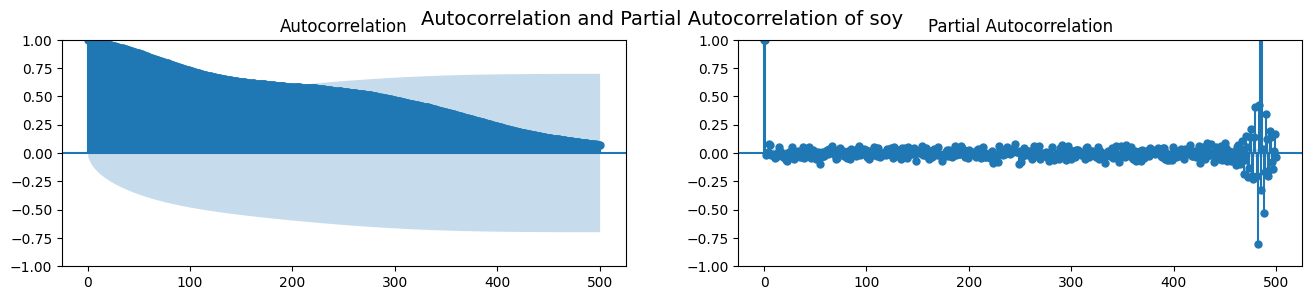

In [58]:
#Autocorrelation and Partial Autocorrelation Graphs
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
fig.suptitle("Autocorrelation and Partial Autocorrelation of soy", fontsize=14)
plot_acf(soy['Price'].tolist(), lags=500, ax=axes[0])
plot_pacf(soy['Price'].tolist(), lags=500, ax=axes[1])

## Soybean and Wheat Analysis

In [59]:
corr_wheat_soy = df_wheat[['Date', 'Price', 'Change %']].set_index("Date").join(df_soy[['Date', 'Price', 'Change %']].set_index('Date'), lsuffix = '_wheat', rsuffix = '_soy')
corr_matrix_ws = corr_wheat_soy.corr()

print("Correlation matrix between Wheat and Soy:")
print(corr_matrix_ws)

Correlation matrix between Wheat and Soy:
                Price_wheat  Change %_wheat  Price_soy  Change %_soy
Price_wheat        1.000000        0.041643   0.855334      0.023242
Change %_wheat     0.041643        1.000000   0.003047      0.352155
Price_soy          0.855334        0.003047   1.000000      0.033269
Change %_soy       0.023242        0.352155   0.033269      1.000000


### FB prophet of Wheat with and without multivariate weather index

In [60]:
#wheat train and wheat test
wheat.rename(columns = {'Price':'y','Date':'ds'}, inplace = True)
wheat_train = wheat[:int(0.8*len(wheat))]
wheat_test = wheat[int(0.8*len(wheat)):]

In [61]:
model_wheat_single = Prophet(interval_width = 0.9)
model_wheat_single.fit(wheat_train)

wheat_single_test_feed = wheat_test[['ds']]
forecast_wheat_single = model_wheat_single.predict(wheat_single_test_feed)
forecast_wheat_single2 = forecast_wheat_single [['ds', 'yhat']]

final_wheat_single = forecast_wheat_single2.merge(wheat_test, how = 'left')

mape_wheat_single = mape(final_wheat_single.y, final_wheat_single.yhat)
mae_wheat_single = mae(final_wheat_single.y, final_wheat_single.yhat)
print("wheat_single mape error:", mape_wheat_single)
print("wheat_single mae error:", mae_wheat_single)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


wheat_single mape error: 0.2816599512809167
wheat_single mae error: 2.141733499180992


Text(0.5, 1.0, 'wheat Price Prediciton without Weather Index')

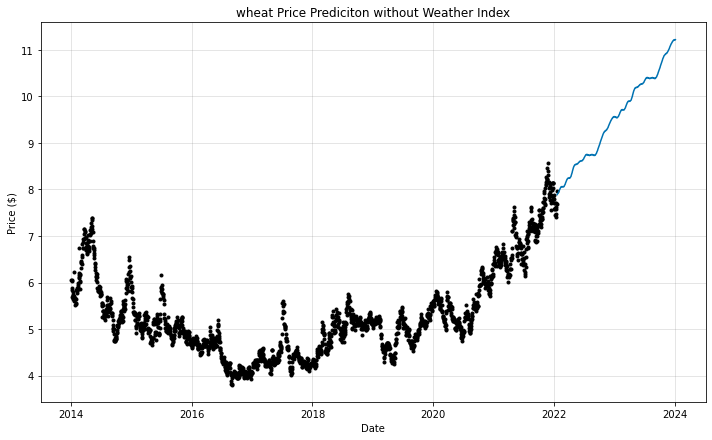

In [62]:
wheatfig1 = model_wheat_single.plot(forecast_wheat_single, uncertainty=False, xlabel = "Date", ylabel = "Price ($)")
wheatax1 = wheatfig1.get_axes()
wheatax1[0].set_title("wheat Price Prediciton without Weather Index")

D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Text(0.5, 1.0, 'Component graphs for wheat Price Prediciton without Weather Index')

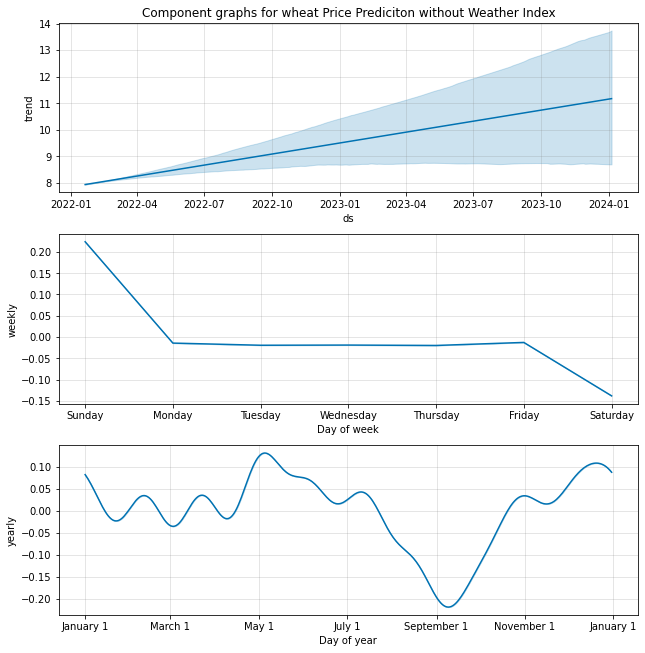

In [63]:
wheatfig2 = model_wheat_single.plot_components(forecast_wheat_single)
wheatax2 = wheatfig2.get_axes()
wheatax2[0].set_title("Component graphs for wheat Price Prediciton without Weather Index")

In [64]:
model_wheat_multi = Prophet(interval_width = 0.9)
model_wheat_multi.add_regressor('PRCP', standardize = True)
model_wheat_multi.add_regressor('TMAX', standardize = True)
model_wheat_multi.add_regressor('TMIN', standardize = True)
model_wheat_multi.fit(wheat_train)

wheat_multi_test_feed = wheat_test[['ds', 'PRCP', 'TMAX', 'TMIN']]
forecast_wheat_multi = model_wheat_multi.predict(wheat_multi_test_feed)
forecast_wheat_multi2 = forecast_wheat_multi [['ds', 'yhat']]

final_wheat_multi = forecast_wheat_multi2.merge(wheat_test, how = 'left')

mape_wheat_multi = mape(final_wheat_multi.y, final_wheat_multi.yhat)
mae_wheat_multi = mae(final_wheat_multi.y, final_wheat_multi.yhat)
print("wheat_multi mape error:", mape_wheat_multi)
print("wheat_multi mae error:", mae_wheat_multi)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


wheat_multi mape error: 0.28234748926744363
wheat_multi mae error: 2.147035983638949


Text(0.5, 1.0, 'wheat Price Prediciton with Weather Index')

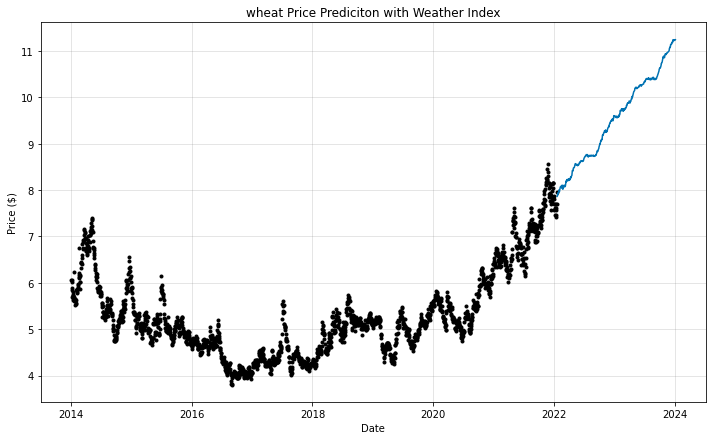

In [65]:
wheatfig3 = model_wheat_multi.plot(forecast_wheat_multi, uncertainty=False, xlabel = "Date", ylabel = "Price ($)")
wheatax3 = wheatfig3.get_axes()
wheatax3[0].set_title("wheat Price Prediciton with Weather Index")

D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Text(0.5, 1.0, 'Component graphs for wheat Price Prediciton with Weather Index')

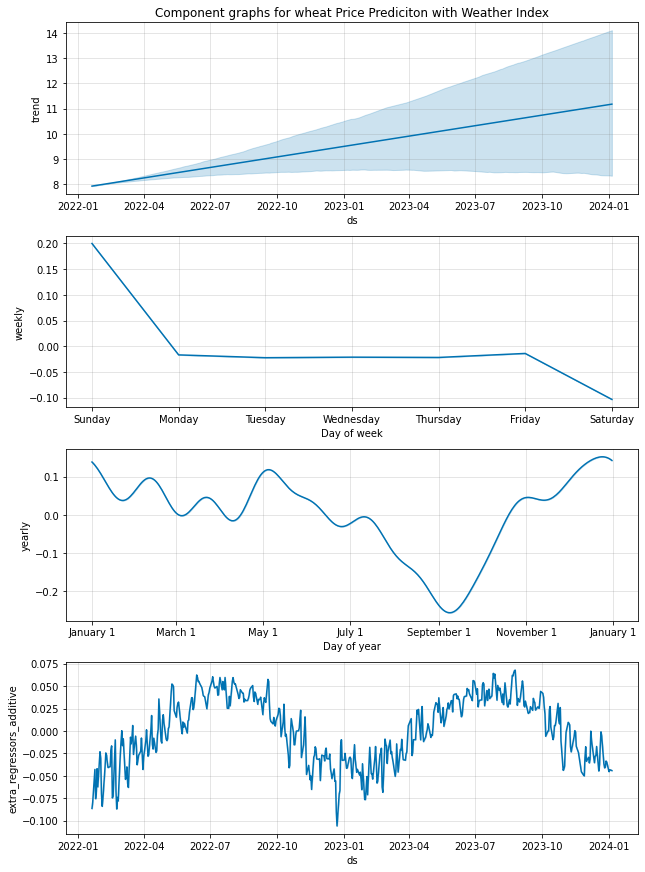

In [66]:
wheatfig4 = model_wheat_multi.plot_components(forecast_wheat_multi)
wheatax4 = wheatfig4.get_axes()
wheatax4[0].set_title("Component graphs for wheat Price Prediciton with Weather Index")

### FB prophet of Soybean with and without multivariate weather index

In [67]:
#soy train and soy test
soy.rename(columns = {'Price':'y','Date':'ds'}, inplace = True)
soy_train = soy[:int(0.8*len(soy))]
soy_test = soy[int(0.8*len(soy)):]

In [68]:
model_soy_single = Prophet(interval_width = 0.9)
model_soy_single.fit(soy_train)

soy_single_test_feed = soy_test[['ds']]
forecast_soy_single = model_soy_single.predict(soy_single_test_feed)
forecast_soy_single2 = forecast_soy_single [['ds', 'yhat']]

final_soy_single = forecast_soy_single2.merge(soy_test, how = 'left')

mape_soy_single = mape(final_soy_single.y, final_soy_single.yhat)
mae_soy_single = mae(final_soy_single.y, final_soy_single.yhat)
print("soy_single mape error:", mape_soy_single)
print("soy_single mae error:", mae_soy_single)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


soy_single mape error: 0.26187713294225123
soy_single mae error: 3.6671723550095847


Text(0.5, 1.0, 'soy Price Prediciton without Weather Index')

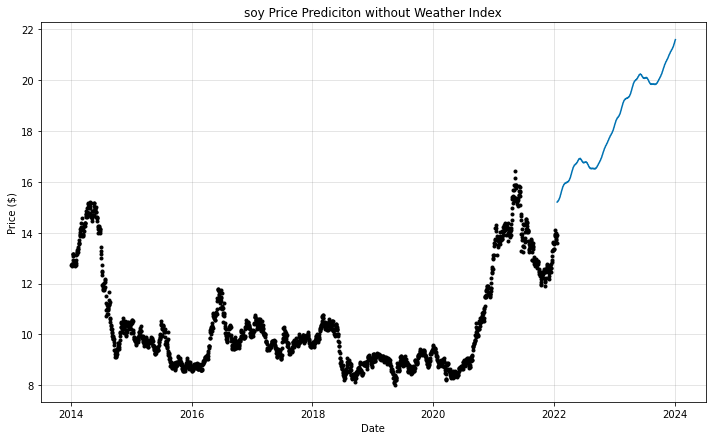

In [69]:
soyfig1 = model_soy_single.plot(forecast_soy_single, uncertainty=False, xlabel = "Date", ylabel = "Price ($)")
soyax1 = soyfig1.get_axes()
soyax1[0].set_title("soy Price Prediciton without Weather Index")

D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Text(0.5, 1.0, 'Component graphs for soy Price Prediciton without Weather Index')

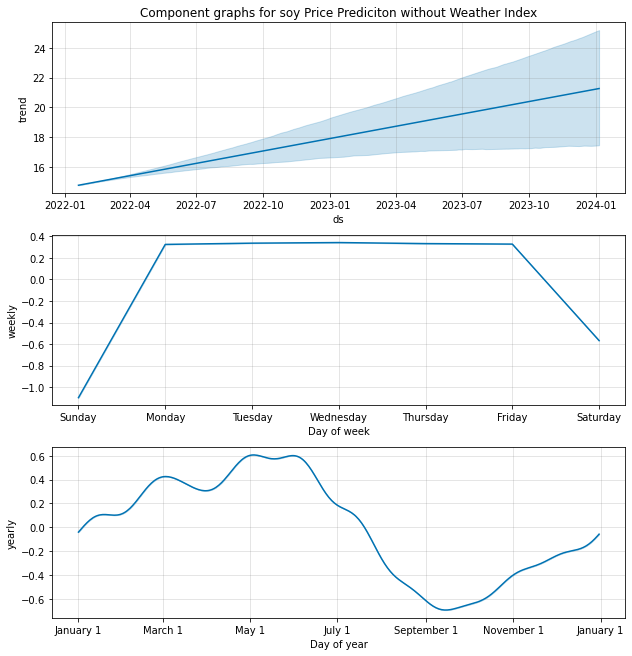

In [70]:
soyfig2 = model_soy_single.plot_components(forecast_soy_single)
soyax2 = soyfig2.get_axes()
soyax2[0].set_title("Component graphs for soy Price Prediciton without Weather Index")

In [71]:
model_soy_multi = Prophet(interval_width = 0.9)
model_soy_multi.add_regressor('PRCP', standardize = True)
model_soy_multi.add_regressor('TMAX', standardize = True)
model_soy_multi.add_regressor('TMIN', standardize = True)
model_soy_multi.fit(soy_train)

soy_multi_test_feed = soy_test[['ds', 'PRCP', 'TMAX', 'TMIN']]
forecast_soy_multi = model_soy_multi.predict(soy_multi_test_feed)
forecast_soy_multi2 = forecast_soy_multi [['ds', 'yhat']]

final_soy_multi = forecast_soy_multi2.merge(soy_test, how = 'left')

mape_soy_multi = mape(final_soy_multi.y, final_soy_multi.yhat)
mae_soy_multi = mae(final_soy_multi.y, final_soy_multi.yhat)
print("soy_multi mape error:", mape_soy_multi)
print("soy_multi mae error:", mae_soy_multi)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


soy_multi mape error: 0.2597372288404346
soy_multi mae error: 3.637542936640813


Text(0.5, 1.0, 'soy Price Prediciton with Weather Index')

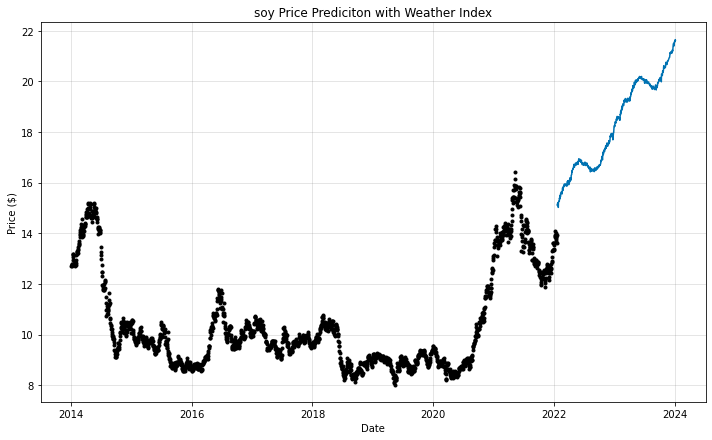

In [72]:
soyfig3 = model_soy_multi.plot(forecast_soy_multi, uncertainty=False, xlabel = "Date", ylabel = "Price ($)")
soyax3 = soyfig3.get_axes()
soyax3[0].set_title("soy Price Prediciton with Weather Index")

D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Anaconda\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Text(0.5, 1.0, 'Component graphs for soy Price Prediciton with Weather Index')

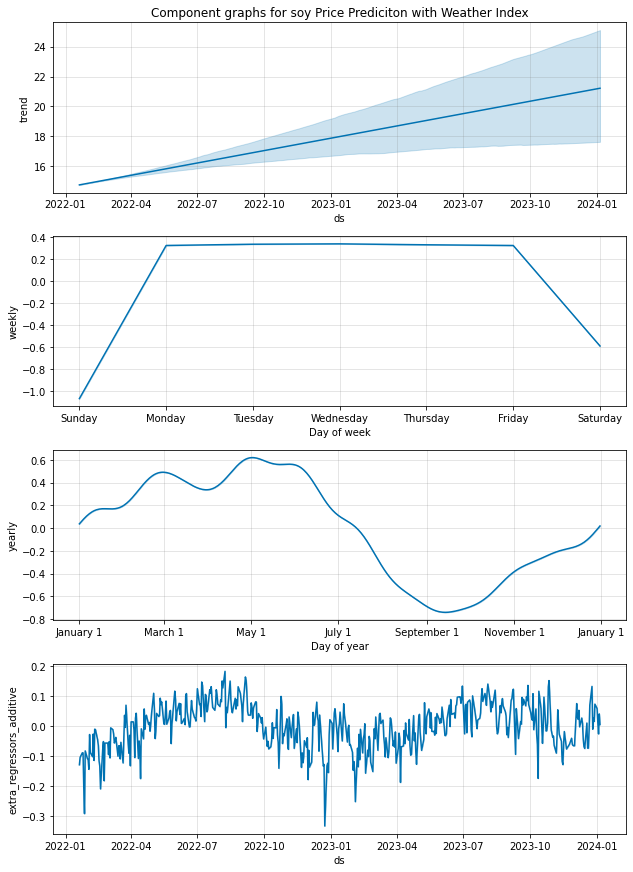

In [73]:
soyfig4 = model_soy_multi.plot_components(forecast_soy_multi)
soyax4 = soyfig4.get_axes()
soyax4[0].set_title("Component graphs for soy Price Prediciton with Weather Index")